# The Current Landscape of Elite Chess (2025)

This project conducts a comprehensive analysis of the professional chess landscape using official data from the **International Chess Federation (FIDE)**. 

This study focuses on a **cross-sectional snapshot** of the current global elite. By analyzing the December 2025 ranking, we aim to explore:

* **Demographic Distribution:** Mapping the concentration of Grandmasters across federations, gender, and age brackets to visualize the current geopolitical and generational structure of the elite.
* **Format Synergy:** Investigating the correlation between Standard, Rapid, and Blitz ratings to determine how performance in one time control relates to others.
* **Competitive Archetypes:** Using statistical dispersion (Standard Deviation) to identify and categorize players based on their rating consistency, seeking to isolate "Specialists" from "All-Rounders."
* **Age Dynamics:** Examining the impact of age on competitive performance to detect if there are specific life stages or "inflection points" where rating stability and format versatility begin to shift.

**Data Source:** [FIDE Official Ratings](https://ratings.fide.com/download_lists.phtml) (Snapshot: December 2025).


# Project Roadmap 
This analysis is structured into seven key phases to ensure data integrity and insight depth:

1. **Data Ingestion**: Loading and initial inspection of the FIDE December 2025 dataset.
2. **Structural Audit**: Verification of data types, missing values, and schema consistency.
3. **Data Refinement & Demographics**: IQR-based outlier removal and GM vs. WGM distribution analysis.
4. **Geopolitical Mapping**: Performance and volume analysis by national federation.
5. **Format Synergy**: Correlation study between Standard, Rapid, and Blitz ratings.
6. **Performance Lifecycle**: Age-based decay analysis and the "Strategic Buffer" hypothesis.
7. **Final Synthesis**: Executive summary and professional conclusions.


## 1. Data Ingestion

The first step involves extracting the raw information from the official FIDE registry and verifying its integrity for statistical analysis.

### **1.1. Data Acquisition**
* **Source:** [FIDE Official Ratings](https://ratings.fide.com/download_lists.phtml) (December 2025).
* **Format:** Raw XML.
* **Process:** The data was ingested using the **Pandas `read_xml`** engine to convert the FIDE registry into a structured DataFrame.


In [57]:
import pandas as pd
import numpy as np

file_path = "players_list_xml\players_list_xml_foa.xml"

df = pd.read_xml(file_path)

df.head()



<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\iarg5\AppData\Local\Temp\ipykernel_436\1387684116.py:4: SyntaxWarning: invalid escape sequence '\p'
  file_path = "players_list_xml\players_list_xml_foa.xml"


,fideid,name,country,sex,title,w_title,o_title,foa_title,rating,games,k,rapid_rating,rapid_games,rapid_k,blitz_rating,blitz_games,blitz_k,birthday,flag
0,10292519,"A A M Imtiaz, Chowdhury",BAN,M,None,None,None,None,0,0,0,0,0,0,0,0,0,1975.0,None
1,10688862,"A Abdel Maabod, Hoda",EGY,F,None,None,None,None,0,0,0,0,0,0,0,0,0,2009.0,w
2,33496722,A Aman,IND,M,None,None,None,None,0,0,0,0,0,0,0,0,0,1996.0,None
3,537001345,A Arbhin Vanniarajan,IND,M,None,None,None,None,0,0,0,1491,6,40,0,0,0,2018.0,None
4,35853913,"A Aziz, Mohd Azizi Jamil",MAS,M,None,None,None,None,0,0,0,0,0,0,0,0,0,1981.0,None


### Data Dictionary & Feature Definitions

To maintain a clear analytical framework, we have defined the following features extracted from the FIDE database. This dictionary serves as a reference for the technical shorthand used in the dataset:

| Feature | Description |
| :--- | :--- |
| **name / fideid** | Player's full name and unique FIDE identification code. |
| **rating / rapid_rating / blitz_rating** | Ratings for **Standard**, **Rapid**, and **Blitz** formats, respectively. |
| **games / rapid_games / blitz_games** | Number of games played in the current period for each format. |
| **k / rapid_k / blitz_k** | **K-factor**: Determines the rating volatility (how much ELO changes per game). |
| **birthday** | Year of birth (Primary variable for Age Peak analysis). |
| **sex / country** | Biological sex (M/F) and country. |
| **title** | Professional titles (e.g., **GM**: Grand Master, **WGM**: Woman Grand Master). |
| **o_title** | Other official roles (Arbiter, Trainer, Organizer). |
| **w_title** | Women Title
| **flag** | Activity status (e.g., **I**: Inactive, **w**: Woman). |

> **Strategic Focus:** Our analysis will prioritize players with the **"GM" (Grand Master)** and **WGM (Women Grand Master)** titles to model peak performance among the world's elite.


## 2. Data Structural Audit
Before processing, we conduct a structural audit to verify the integrity of the raw data. This technical baseline ensures that the file was loaded correctly and identifies the formatting requirements for the subsequent cleaning phase.

Schema Verification: Inspecting data types and columns.

Data Density: Assessing the presence of non-null values across all features.

Memory Footprint: Evaluating the scale of the dataset to optimize processing.

In [58]:
df.info(show_counts=True)
df.size
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753699 entries, 0 to 1753698
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   fideid        1753699 non-null  int64  
 1   name          1753699 non-null  object 
 2   country       1753699 non-null  object 
 3   sex           1753699 non-null  object 
 4   title         23814 non-null    object 
 5   w_title       4956 non-null     object 
 6   o_title       6174 non-null     object 
 7   foa_title     14127 non-null    object 
 8   rating        1753699 non-null  int64  
 9   games         1753699 non-null  int64  
 10  k             1753699 non-null  int64  
 11  rapid_rating  1753699 non-null  int64  
 12  rapid_games   1753699 non-null  int64  
 13  rapid_k       1753699 non-null  int64  
 14  blitz_rating  1753699 non-null  int64  
 15  blitz_games   1753699 non-null  int64  
 16  blitz_k       1753699 non-null  int64  
 17  birthday      1719921 non-n

(1753699, 19)

### 2.1 Grandmaster Subset Selection
To focus our analysis on elite performance, we isolate players holding the **Grandmaster (GM)** and **Woman Grandmaster (WGM)** titles. This reduction allows for a more targeted exploration of peak professional metrics.

In [59]:
df['title'].value_counts()
condition = (df['title'] == 'GM') | (df['title'] == 'WGM')
gm = df[condition].reset_index(drop=True)
gm.head(10)

,fideid,name,country,sex,title,w_title,o_title,foa_title,rating,games,k,rapid_rating,rapid_games,rapid_k,blitz_rating,blitz_games,blitz_k,birthday,flag
0,1401815,"Aagaard, Jacob",DEN,M,GM,None,None,None,2423,0,10,2502,0,10,2509,0,10,1973.0,None
1,13402960,"Abasov, Nijat",AZE,M,GM,None,FST,None,2587,4,10,2559,0,10,2555,0,10,1995.0,None
2,12501000,"Abbasifar, Hasan",ESP,M,GM,None,None,None,2291,0,10,2268,0,10,2298,0,20,1972.0,None
3,13400665,"Abbasov, Farid",AZE,M,GM,None,FT,None,2493,0,10,2451,0,10,2456,0,10,1979.0,None
4,14206323,"Abdisalimov, Abdimalik",UZB,M,GM,None,None,None,2561,17,10,2435,0,10,2478,0,10,2002.0,None
5,13401807,"Abdulla, Khayala",AZE,F,WGM,WGM,None,None,2213,0,20,2147,0,20,2106,0,20,1993.0,wi
6,13703544,"Abdumalik, Zhansaya",KAZ,F,GM,WGM,None,None,2468,0,10,2453,0,10,2383,0,10,2000.0,wi
7,14204118,"Abdusattorov, Nodirbek",UZB,M,GM,None,None,None,2732,4,10,2717,2,10,2768,0,10,2004.0,None
8,614890,"Abergel, Thal",FRA,M,GM,None,None,None,2403,9,10,2436,5,10,2355,0,10,1982.0,None
9,3502589,"Abreu Delgado, Aryam",CUB,M,GM,None,None,None,2434,0,10,2456,0,10,2402,0,10,1978.0,i


### 2.2 Feature Selection
We remove administrative metadata and secondary title columns (`o_title`, `w_title`, `rapid_k`, `blitz_k`, etc.) that do not contribute to the core analysis of performance and demographics.

In [60]:
columns_drop = ['w_title', 'o_title', 'foa_title', 'k', 'rapid_k', 'blitz_k']
gm = gm.drop(columns=[c for c in columns_drop if c in gm.columns]) 
gm.columns

Index(['fideid', 'name', 'country', 'sex', 'title', 'rating', 'games',
       'rapid_rating', 'rapid_games', 'blitz_rating', 'blitz_games',
       'birthday', 'flag'],
      dtype='object')

### 2.3 Data Integrity Check (GM Subset)
With the dataset narrowed down to elite players, we perform a final inspection of the remaining features. This check confirms the count of non-null values and verifies if numerical data (Ratings and Birth Year) are stored as objects, which is a prerequisite for the type conversion phase.

In [61]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fideid        2211 non-null   int64  
 1   name          2211 non-null   object 
 2   country       2211 non-null   object 
 3   sex           2211 non-null   object 
 4   title         2211 non-null   object 
 5   rating        2211 non-null   int64  
 6   games         2211 non-null   int64  
 7   rapid_rating  2211 non-null   int64  
 8   rapid_games   2211 non-null   int64  
 9   blitz_rating  2211 non-null   int64  
 10  blitz_games   2211 non-null   int64  
 11  birthday      2211 non-null   float64
 12  flag          933 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 224.7+ KB


### 2.4. Categorical Consistency and Value Inspection
We perform a validation of unique values across categorical columns (`sex`, `titl`, `country`) to detect anomalies, inconsistent formatting, or unexpected entries. This ensures the integrity of the filters applied and the demographic segments to be analyzed.

In [62]:
columns_to_check = ['country', 'sex', 'title', 'flag']

for col in columns_to_check:
    print(f"Unique values in {col}")
    print(gm[col].unique())
    

Unique values in country
['DEN' 'AZE' 'ESP' 'UZB' 'KAZ' 'FRA' 'CUB' 'HUN' 'ENG' 'IND' 'EGY' 'RUS'
 'MDA' 'NOR' 'TUR' 'ARM' 'SWE' 'JOR' 'USA' 'QAT' 'BLR' 'AUT' 'ISR' 'GRE'
 'GEO' 'IRI' 'ARG' 'TKM' 'TJK' 'UKR' 'FID' 'MNE' 'SRB' 'POL' 'PHI' 'POR'
 'GER' 'SCO' 'COL' 'ISL' 'BUL' 'CZE' 'IRL' 'PAR' 'ROU' 'MNC' 'LTU' 'CHN'
 'BRA' 'CAN' 'INA' 'ITA' 'MGL' 'NED' 'SLO' 'TUN' 'ALG' 'LUX' 'LAT' 'BIH'
 'MKD' 'SUI' 'SVK' 'CRO' 'ECU' 'VIE' 'CHI' 'PER' 'NZL' 'AUS' 'BEL' 'MEX'
 'AND' 'ALB' 'EST' 'NON' 'VEN' 'SGP' 'CRC' 'RSA' 'MAR' 'BAN' 'SEN' 'FIN'
 'KOR' 'DOM' 'URU' 'UAE' 'BOT' 'ZAM' 'TPE' 'MAS' 'BOL' 'FAI']
Unique values in sex
['M' 'F']
Unique values in title
['GM' 'WGM']
Unique values in flag
[None 'wi' 'i' 'w']


### 2.5. Data Cleaning & Type Casting
To ensure data quality, we remove duplicate records and apply `.strip()` to string columns to eliminate leading/trailing whitespace. Finally, we cast all features to their **appropriate data types**

In [63]:
gm = gm.drop_duplicates()
correct_dtype = {'name' : 'string',
                 'country' : 'category',
                 'sex' : 'category',
                 'title' : 'category',
                 'birthday' : 'int64',
                 'flag' : 'category'}
gm = gm.astype(correct_dtype)
gm['name'] = gm['name'].str.strip()
gm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fideid        2211 non-null   int64   
 1   name          2211 non-null   string  
 2   country       2211 non-null   category
 3   sex           2211 non-null   category
 4   title         2211 non-null   category
 5   rating        2211 non-null   int64   
 6   games         2211 non-null   int64   
 7   rapid_rating  2211 non-null   int64   
 8   rapid_games   2211 non-null   int64   
 9   blitz_rating  2211 non-null   int64   
 10  blitz_games   2211 non-null   int64   
 11  birthday      2211 non-null   int64   
 12  flag          933 non-null    category
dtypes: category(4), int64(8), string(1)
memory usage: 167.4 KB


### 2.6 Final Sanity Check & Outlier Detection
To finalize the cleaning process, we verify that the remaining data points fall within logical ranges for professional chess:
* **Ratings:** Ensuring no ratings are negative.
* **Birthday:** Identifying any unrealistic birthdates.

In [64]:
num_cols = ['rating', 'rapid_rating', 'blitz_rating', 'birthday']

for col in num_cols:
    max_value = gm[col].max()
    min_value = gm[col].min()
    print(f'{col} max value: {max_value}, min value: {min_value}')

rating max value: 2840, min value: 1728
rapid_rating max value: 2824, min value: 0
blitz_rating max value: 2881, min value: 0
birthday max value: 2011, min value: 1921


### 2.7 Semantic Column Renaming
To avoid ambiguity we rename `rating` and `games` to more explicit titles. This clarifies that these metrics refer to **Standard** chess format performance within the current reporting period.

In [65]:
cols_rename = {'rating' : 'standard_rating',
               'games' : 'standard_games'}
gm = gm.rename(columns=cols_rename)
gm.columns

Index(['fideid', 'name', 'country', 'sex', 'title', 'standard_rating',
       'standard_games', 'rapid_rating', 'rapid_games', 'blitz_rating',
       'blitz_games', 'birthday', 'flag'],
      dtype='object')

### 2.8 Final Activity Filtering
To ensure the analysis reflects the **active** competitive landscape, we filter out players flagged as inactive (`i` or `wi`) in the `FLAG` column. This step focuses the study on Grandmasters currently participating in FIDE-rated events. Once the filter is applied, the `FLAG` column is removed as it no longer provides additional variance to the dataset.
It is worth noting that FIDE considers a player inactive if they have not played a game for at least one year.

In [66]:
active_gm = gm[~gm['flag'].isin(['i', 'wi'])]
active_gm = active_gm.drop(columns='flag')



### 2.9 Data Persistence
To optimize subsequent sessions and avoid re-processing the raw XML file, we export the cleaned DataFrame. We use the **Parquet** format instead of CSV to preserve the schema (data types) and ensure efficient storage and loading speeds.

In [67]:
import pyarrow
active_gm.to_parquet('active_grandmasters_2025_cleaned.parquet')


# 3. Data Cleaning & Demographic Distribution
In this phase, we explore the cleaned dataset to uncover patterns, correlations, and demographic trends. We begin by loading the processed data and initializing the visualization libraries.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.precision = 3

agm = pd.read_parquet('active_grandmasters_2025_cleaned.parquet')
agm.head(10)
agm.tail(10)
agm.describe()

,fideid,standard_rating,standard_games,rapid_rating,rapid_games,blitz_rating,blitz_games,birthday
count,1.487e+03,1487.000,1487.000,1487.000,1487.000,1487.000,1487.000,1487.000
mean,7.171e+06,2444.399,3.486,2296.343,1.745,2288.793,1.634,1982.972
std,7.902e+06,142.823,5.237,575.871,4.308,579.298,4.777,14.608
min,1.000e+05,1756.000,0.000,0.000,0.000,0.000,0.000,1941.000
25%,1.442e+06,2368.500,0.000,2340.000,0.000,2327.500,0.000,1972.000
50%,4.148e+06,2465.000,0.000,2443.000,0.000,2437.000,0.000,1985.000
75%,1.330e+07,2540.000,6.000,2519.000,0.000,2518.000,0.000,1994.000
max,5.418e+07,2840.000,40.000,2824.000,39.000,2881.000,44.000,2011.000


### 3.0.1. Note on Monthly Activity and Player Status
During the exploration phase, we observed several players with **zero games** recorded in the `standard_games`, `rapid_games`, and `blitz_games` columns for the current period. 

We have decided **not to exclude** these players from the analysis for two reasons:
1. **FIDE Activity Criteria:** FIDE maintains a player's "Active" status as long as they have played at least one rated game within the last 12 months. Therefore, these players are still part of the current professional circuit.
2. **Data Seasonality:** Since our dataset represents a snapshot of **December 2025**, a zero in the games column simply indicates that the player did not participate in rated tournaments during this specific month, but they may have been highly active in previous months of the year.

By retaining these players, we ensure a more comprehensive representation of the total population of Grandmasters recognized as active by the international federation.

### 3.1. Outlier Detection 
Upon initial inspection, the minimum value in the `standard_rating` column was found to be **1756**. This is unusually low for the Grandmaster title in a modern competitive context. 

To investigate this further, we use a **Boxplot** to visualize the rating distribution and identify outliers. The boxplot uses the **Interquartile Range (IQR)** method, where any data point falling below $Q_1 - 1.5 \times \text{IQR}$ is statistically considered an outlier. 
Additionally, we categorize the analysis by **title** to account for the different regulatory thresholds established by FIDE. While the **Grandmaster (GM)** title generally requires a minimum rating of **2500**, the **Woman Grandmaster (WGM)** title has a minimum requirement of **2300**.

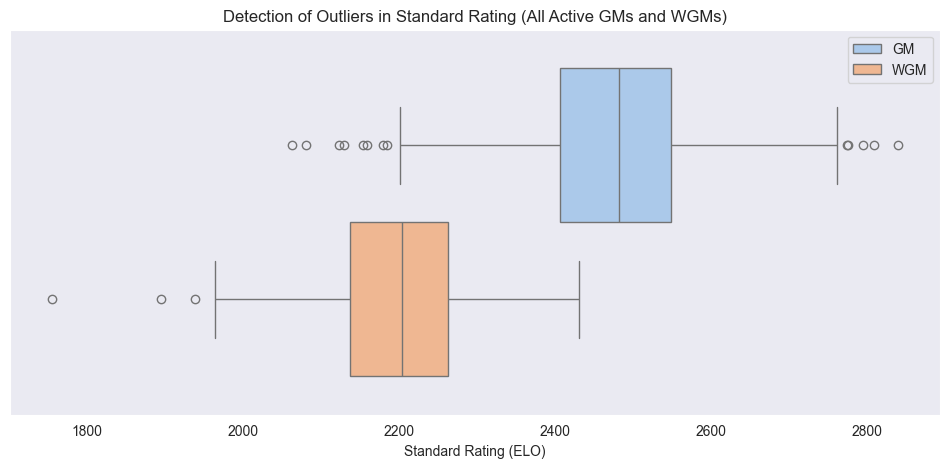

In [69]:
plt.figure(figsize=(12, 5))
sns.set_style('dark')
sns.boxplot(x=agm['standard_rating'],
            palette='pastel',
            hue=agm['title'])
plt.title('Detection of Outliers in Standard Rating (All Active GMs and WGMs)')
plt.xlabel('Standard Rating (ELO)')
plt.legend(['GM', 'WGM'])
plt.show()

### 3.2. Establishing the Competitive Threshold (IQR Method)
To transition from a general census to a professional performance analysis, we define a **Competitive Threshold** using the Interquartile Range (IQR) method. 

By calculating the `Lower Bound` ($Q_1 - 1.5 \times \text{IQR}$), we can objectively identify the point where a rating is no longer representative of the active elite. This allows us to filter out historical outliers—players who maintain their lifelong titles but are no longer active at the professional ELO standards. Our goal is to ensure that subsequent correlations and gender gap analyses are based on a robust and homogeneous dataset.

In [70]:
# Group by 'title' then calculate the first and third quartile from standard rating
quartiles = agm.groupby('title', observed=True)\
            ['standard_rating'].quantile([0.25, 0.75])\
            .unstack() 
quartiles.columns = ['Q1', 'Q3']
quartiles

q1_gm = quartiles.loc['GM', 'Q1']
q3_gm = quartiles.loc['GM', 'Q3']

q1_wgm = quartiles.loc['WGM', 'Q1']
q3_wgm = quartiles.loc['WGM', 'Q3']

# Calculate the IQR for each title
gm_iqr = q3_gm - q1_gm 
wgm_iqr = q3_wgm - q1_wgm

gm_lower_bound = q1_gm - (1.5 * gm_iqr)
wgm_lower_bound = q1_wgm - (1.5 * wgm_iqr)

print(f"GM Lower Bound: {gm_lower_bound:.2f}")
print(f"WGM Lower Bound: {wgm_lower_bound:.2f}")

GM Lower Bound: 2194.00
WGM Lower Bound: 1949.00


### 3.3. Rationalizing Asymmetric Outlier Removal
It is important to note that our filtering process focuses exclusively on **Lower Outliers**. While the dataset also contains **Upper Outliers** (elite players with ratings significantly higher than the average GM), we have chosen to retain them for the following reasons:

1. **Competitiveness:** High outliers represent the pinnacle of current professional chess performance (Super Grandmasters). Excluding them would mean losing the most relevant data regarding the game's ceiling.
2. **Data Integrity:** Lower outliers in this dataset often represent historical titles or extreme inactivity, which do not reflect modern competitive standards. In contrast, higher outliers are the most active and scrutinized players in the world.
3. **Research Goal:** Since our objective is to analyze the "Active Elite," we must include the top performers, even if they are statistically distant from the median.
4. **Standard Rating as a Professional Proxy:** Because GM and WGM titles are earned exclusively through performance in **Standard (Classical) chess**, this format serves as the primary anchor for a player's professional status. By filtering based on the Classical "quality floor," we ensure that the players included in the study have maintained the foundational level of strength required to hold their titles in the modern era, regardless of their activity in faster time controls.

In [71]:
condition_wgm = (agm['standard_rating'] > wgm_lower_bound) & (agm['title'] == 'WGM')
condition_gm = (agm['standard_rating'] > gm_lower_bound) & (agm['title'] == 'GM')

elite = agm[condition_wgm | condition_gm].copy() #Use .copy() to ensure 'elite' is a standalone DataFrame
elite.head(10)

,fideid,name,country,sex,title,standard_rating,standard_games,rapid_rating,rapid_games,blitz_rating,blitz_games,birthday
0,1401815,"Aagaard, Jacob",DEN,M,GM,2423,0,2502,0,2509,0,1973
1,13402960,"Abasov, Nijat",AZE,M,GM,2587,4,2559,0,2555,0,1995
2,12501000,"Abbasifar, Hasan",ESP,M,GM,2291,0,2268,0,2298,0,1972
3,13400665,"Abbasov, Farid",AZE,M,GM,2493,0,2451,0,2456,0,1979
4,14206323,"Abdisalimov, Abdimalik",UZB,M,GM,2561,17,2435,0,2478,0,2002
7,14204118,"Abdusattorov, Nodirbek",UZB,M,GM,2732,4,2717,2,2768,0,2004
8,614890,"Abergel, Thal",FRA,M,GM,2403,9,2436,5,2355,0,1982
10,708020,"Acs, Peter",HUN,M,GM,2569,0,2474,14,2537,0,1981
11,727709,"Aczel, Gergely",HUN,M,GM,2456,9,2470,0,2394,0,1991
12,400041,"Adams, Michael",ENG,M,GM,2630,6,2629,4,2695,4,1971


### 3.4. Comparative Distribution Analysis (GM vs. WGM)

After filtering the lower outliers, we proceed to visualize the **ELO distribution** through a comparative histogram and Kernel Density Estimate (KDE). 

**Methodological Note:** For this analysis, we are placing **Grandmasters (GM)** and **Woman Grandmasters (WGM)** in a single analytical "bucket" based on gender. This approach allows us to:
1. Compare the **distribution shapes** and central tendencies of both groups on a shared scale.
2. Identify the **ELO gap** between the two populations within the highest tiers of professional chess.
3. Observe the **density of players** across the rating spectrum, acknowledging the significant difference in population size between male and female titleholders.


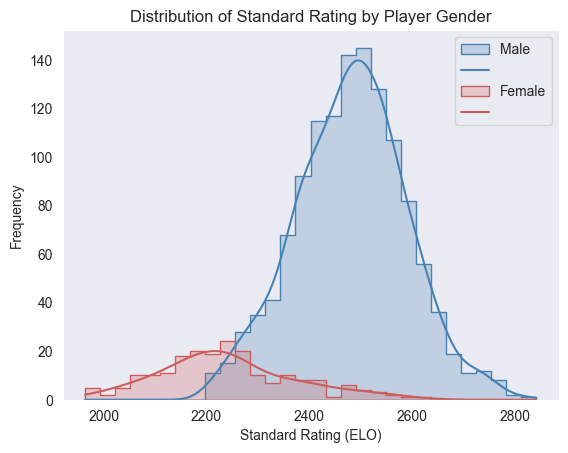

In [72]:
custom_colors = {'M': '#4682B4', 'F': '#CD5C5C'}
sns.set_style('dark')
sns.histplot(data=elite, 
            x='standard_rating',
            hue='sex',
            kde=True,
            element='step',
            palette=custom_colors)
plt.title('Distribution of Standard Rating by Player Gender')
plt.xlabel('Standard Rating (ELO)')
plt.ylabel('Frequency')
plt.legend(title='', labels=['Male', '', 'Female', ''])
plt.show()

### 3.5. Population Volume and Title Distribution Analysis

Before deep-diving into performance metrics, it is crucial to quantify the **gender gap in terms of participation**. The size of a population significantly influences its statistical distribution and the probability of finding extreme performers (outliers).

In this section, we perform a two-fold comparison:
1. **Overall Gender Ratio:** Comparing the total number of male vs. female players in our filtered "Elite" dataset.
2. **Title-Specific Comparison:** Contrasting the number of **GM Male** against **GM Female** and **WGM**.

**Note on Categorization:** Distinguishing between female GMs and WGMs is vital. While the GM title is absolute and requires a higher Elo threshold (~2500), the WGM title is gender-specific with different Elo requirements (~2300). 

**Technical Labeling Note:** Throughout this study, the labels **'GM Male'** and **'GM Female'** are used intentionally. While "Male GM" might be more common in prose, grouping the 'GM' prefix first allows for a more direct visual and structural comparison between the two genders holding the absolute title, clearly distinguishing them from the **WGM** category.

In [73]:
conditions = [
    (elite['title'] == 'GM') & (elite['sex'] == 'M'),
    (elite['title'] == 'GM') & (elite['sex'] == 'F'),
    (elite['title'] == 'WGM')
]

choices = ['GM Male', 'GM Female', 'WGM']

elite['detailed_title'] = np.select(conditions, choices, default='Other')
elite['detailed_title'].value_counts(normalize=True)

detailed_title
GM Male      0.861
WGM          0.118
GM Female    0.021
Name: proportion, dtype: float64

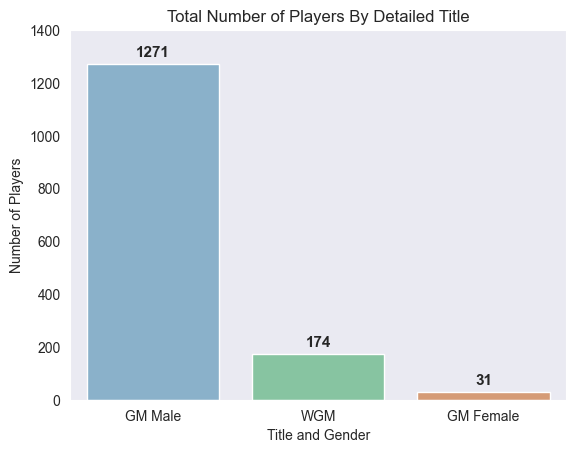

In [74]:
colors = {
    'GM Male': '#7FB3D5',   
    'WGM': '#7DCEA0',      
    'GM Female': '#E59866'  
}
ax = sns.countplot(data=elite,
              x='detailed_title',
              hue='detailed_title',
              palette=colors)
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=11, fontweight='bold')
plt.title('Total Number of Players By Detailed Title')
plt.ylim((0, 1400))
plt.xlabel('Title and Gender')
plt.ylabel('Number of Players')
plt.show()

### 3.6. Quantitative Performance Analysis: ELO Gap by Detailed Title

After identifying the massive disparity in participation, we now move from **quantity** to **quality**. The goal of this section is to quantify the performance gap across the different elite tiers we have defined.

By grouping the data into **GM Male**, **GM Female**, and **WGM**, we can analyze:

1.  **The "Elite Ceiling":** Comparing the maximum ratings (`max`) to observe the absolute limits reached by each group.
2.  **Central Tendency:** Using the `median` and `mean` to find the "typical" rating of a professional in each category, which allows us to measure the ELO distance between titles.
3.  **Title Validation:** Confirming how the **WGM** group (with lower entry requirements) compares numerically to the absolute **GM** categories.

This statistical summary provides the empirical evidence needed to understand the professional hierarchy of FIDE titleholders.

In [75]:
rating_dt = elite.groupby('detailed_title')\
            [['standard_rating', 'rapid_rating', 'blitz_rating']]\
                .agg(['mean','median','max'])\
                    .sort_values(by=('standard_rating', 'max'), ascending=False)

(rating_dt.round(2)
 .style.highlight_max(color='green')
 .format(precision=2))


#### **3.6.1. Key Insights: Rating Performance across Chess Categories**

* **Male Dominance in Absolute Metrics:** Male Grandmasters (GM) maintain the highest scores across all three categories—**Standard, Rapid, and Blitz**—when evaluating maximum ratings (Peak Performance) and medians. 
* **Female GM Leadership in Rapid and Blitz Means:** A significant finding occurs in the **Rapid and Blitz** categories, where **Female Grandmasters (GM)** achieve a higher average (mean) rating than both Male GMs and WGMs. This highlights exceptional consistency and high-level performance by Female GMs in faster chess formats.
* **Overall Category Trends:** Despite the specific leadership of Female GMs in Rapid and Blitz means, Male GMs continue to dominate all other statistical metrics across every category, including all measures within **Standard** chess.
* **Volume Disparity and Statistical Context:** It is crucial to note that **86% of the elite chess population is male**. This significant disparity in sample size between genders can distort direct comparisons. The overwhelming volume of male players increases the statistical probability of higher peak ratings and affects median distributions, a factor that must be considered when interpreting these performance gaps.

### 3.7. National Analysis of Gender Diversity in Elite Chess

Global trends often hide the success stories of specific national chess federations. In this section, we shift our focus from a general overview to a **country-by-country analysis** to understand how gender diversity within the Grandmaster title varies across different nations.

By analyzing the data at a national level, we aim to:
1.  **Identify Leading Nations:** Pinpoint which countries have the highest number of **GM** and **WGM**  and a more balanced ratio of elite titles.
2.  **Cultural Chess Ecosystems:** Highlight countries where female participation in the absolute elite is statistically higher, suggesting more robust development programs or historical traditions.
3.  **Participation vs. Performance:** Observe if countries with a large pool of players also lead in gender diversity, or if smaller federations are over-performing in terms of female representation.

This granular view allows us to identify the specific environments where the gender gap in elite chess is most effectively being bridged.

In [76]:
# Group by country and detailed title
country_diversity = elite.groupby(['country', 'detailed_title']).size().unstack(fill_value=0)
cols_order = ['GM Male', 'GM Female', 'WGM']
existing_cols = [c for c in cols_order if c in country_diversity.columns]
country_diversity = country_diversity[existing_cols] 

country_diversity['total_elite'] = country_diversity.sum(axis=1)
country_diversity['perc_female_repr'] = (
    (country_diversity.get('WGM', 0) + country_diversity.get('GM Female', 0)) / 
    country_diversity['total_elite'] * 100
)

display(country_diversity.sort_values(by='perc_female_repr', ascending=False).head())
print('\n')
# Excluding federations with n < 10 players, this prevents small-sample anomalies from distorting the global demographic trends
top_countries = country_diversity[country_diversity['total_elite'] >=10].sort_values(by='perc_female_repr', ascending=False) 
top_countries.style.highlight_max(color='green')

C:\Users\iarg5\AppData\Local\Temp\ipykernel_436\1326097753.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_diversity = elite.groupby(['country', 'detailed_title']).size().unstack(fill_value=0)


detailed_title,GM Male,GM Female,WGM,total_elite,perc_female_repr
country,,,,,
LUX,0,0,2,2,100.000
ECU,1,0,1,2,50.000
UAE,1,0,1,2,50.000
EGY,4,0,3,7,42.857
CHN,32,6,13,51,37.255


detailed_title,GM Male,GM Female,WGM,total_elite,perc_female_repr
country,,,,,
CHN,32,6,13,51,37.254902
LAT,7,0,4,11,36.363636
KAZ,11,1,4,16,31.250000
CUB,14,0,6,20,30.000000
GEO,18,3,4,25,28.000000
AZE,20,0,7,27,25.925926
CZE,26,0,8,34,23.529412
VIE,10,0,3,13,23.076923
SUI,10,1,2,13,23.076923


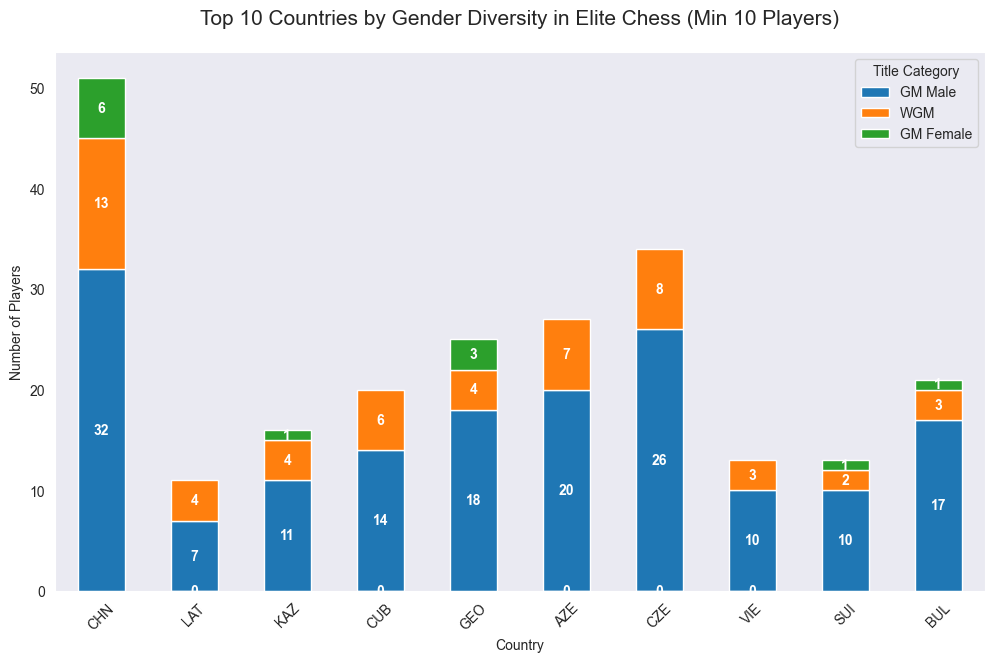

In [77]:
plot_data = top_countries.head(10)[['GM Male', 'WGM', 'GM Female']]

ax = plot_data.plot(kind='bar', stacked=True, figsize=(12, 7))

for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', fontweight='bold')

plt.title('Top 10 Countries by Gender Diversity in Elite Chess (Min 10 Players)', fontsize=15, pad=20)
plt.ylabel('Number of Players')
plt.xlabel('Country')
plt.legend(title='Title Category')
plt.xticks(rotation=45)
plt.show()

In [78]:
# Identify the Top 10 female players to verify federation-performance correlation
top_ten_women = (
    elite.loc[elite['sex'] == 'F', ['name', 'country', 'title', 'standard_rating', 'rapid_rating', 'blitz_rating']]
    .sort_values(by='standard_rating', ascending=False)
    .head(10)
    .reset_index(drop=True))
top_ten_women

,name,country,title,standard_rating,rapid_rating,blitz_rating
0,"Hou, Yifan",CHN,GM,2613,2536,2521
1,"Zhu, Jiner",CHN,GM,2579,2435,2425
2,"Lei, Tingjie",CHN,GM,2569,2496,2478
3,"Ju, Wenjun",CHN,GM,2565,2530,2489
4,"Koneru, Humpy",IND,GM,2535,2448,2430
5,"Goryachkina, Aleksandra",FID,GM,2534,2505,2439
6,"Tan, Zhongyi",CHN,GM,2524,2507,2457
7,"Muzychuk, Anna",UKR,GM,2518,2398,2397
8,"Lagno, Kateryna",RUS,GM,2508,2452,2448
9,Divya Deshmukh,IND,GM,2497,2419,2388


In [79]:
# Identify the Top 10 WGM
top_ten_wgm = (
    elite.loc[elite['title'] == 'WGM', ['name', 'country', 'title', 'standard_rating', 'rapid_rating', 'blitz_rating']]
    .sort_values(by='standard_rating', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

top_ten_wgm

,name,country,title,standard_rating,rapid_rating,blitz_rating
0,"Shukhman, Anna",FID,WGM,2431,2247,2204
1,"Khamdamova, Afruza",UZB,WGM,2403,2365,2227
2,"Ding, Yixin",CHN,WGM,2396,2316,2322
3,"Zhai, Mo",CHN,WGM,2385,2355,2314
4,Rakshitta Ravi,IND,WGM,2381,2082,2218
5,"Wang, Pin",CHN,WGM,2378,2390,0
6,"Balabayeva, Xeniya",KAZ,WGM,2371,2295,2229
7,"Nurman, Alua",KAZ,WGM,2367,2289,2324
8,"Huang, Qian",CHN,WGM,2366,2394,2316
9,"Beydullayeva, Govhar",AZE,WGM,2364,2224,2149


#### **3.8. Key Insights: Gender Representation and Peak Performance**

* **Small Federation Anomalies:** **Luxembourg** stands as a unique case with **100% female representation** (2 WGMs). **Egypt** also shows a significant balance, with a **42.85%** female participation rate (3 WGMs out of 7 elite players).

* **China: The Absolute Leader in Peak Performance:**
    * China leads major powerhouses with **37.25%** female representation (19 women out of 51 players).
    * It is the global leader in absolute **Female GMs (6)**. 
    * **Top 10 Correlation:** This volume translates directly to the top of the pyramid. In the Top 10 female players (Standard rating), **5 are Chinese**, including the **top 4 spots.** **Hou Yifan** remains the world’s top-ranked female player.
    * **WGM Depth:** China holds the second-highest number of WGMs (**13**), with 4 of them appearing in the **WGM Top 10** (occupying positions 3, 4, 6, and 9).

* **Germany and the USA: High Volume vs. Elite Concentration:**
    * **Germany** holds the highest total volume of elite players (**90**) and the largest number of WGMs (**14**). However, despite this quantity, **no German WGM appears in the Top 10**, and the federation has only **one** absolute Female GM.
    * **The United States** matches Germany in Male GMs (**75**) but shows a significantly lower female participation rate of **3.84%**, with only one Female GM and two WGMs.

* **The FID Exception:** While China dominates the rankings, the #1 spot in the **WGM Top 10** is held by **Ann Shukhman**, representing the **FID (FIDE)** federation.

* **Methodological Note:** For this analysis, the absolute **Grandmaster (GM)** title has been disaggregated by sex (**GM Male** vs. **GM Female**). This allows for a direct comparison with the **Woman Grandmaster (WGM)** category, revealing that China not only possesses the highest volume of female players but also the highest concentration of those reaching the absolute highest rank in the professional hierarchy.

* **Data Filtering Note:** To ensure statistical relevance and avoid skewing results with small sample sizes, federations with fewer than 10 players in the elite dataset were excluded from the percentage-based ranking. 

### 3.9. Section 3 Conclusions: Demographic and Performance Synthesis

The analysis of the active elite chess population (December 2025) provides a statistical mapping of the professional landscape. The following points synthesize the methodological and performance findings:

* **Methodological Foundation:** The study defines the "Active Elite" by filtering historical outliers using the Interquartile Range (IQR) method on Standard ratings. While lower outliers were removed to ensure a modern professional baseline, upper outliers were retained to maintain the integrity of the performance ceiling.

* **Demographic Imbalance:** The elite population is characterized by a significant gender participation gap. Of the total filtered dataset, **86.1% (1,271) are Male GMs**, **11.8% (174) are WGMs**, and only **2.1% (31) are Female GMs**. This volume disparity influences statistical probability, as the larger male pool naturally increases the likelihood of higher peak ratings and extreme outliers.

* **Statistical Sensitivity in Performance Metrics:** While Female GMs exhibit higher **mean** ratings in Rapid and Blitz formats, this result is subject to sample size bias. With a population of only 31 players, the mean is susceptible to the influence of high-performing individuals (outliers). Analysis of **median** values —a more robust metric for skewed distributions— confirms that Male GMs maintain dominance across all time controls.

* **Title and Format Correlation:** Standard (Classical) ratings serve as the primary proxy for professional status due to FIDE’s regulatory requirements for the GM and WGM titles. The data shows that while Female GMs demonstrate high consistency in faster time controls, the absolute rating ceiling remains dominated by the male cohort.

* **National Ecosystem Variations:** Regional analysis reveals distinct development models. **China** represents the benchmark for high-tier female performance, holding the highest concentration of Female GMs and top-ranked practitioners. Conversely, federations like **Germany** demonstrate high volume (total players and WGMs) but lower concentration in the absolute elite (GM) tier. The **United States** shows a high Male GM count but a notably low female participation rate (3.84%).

* **Final Insight:** The elite chess ecosystem is an environment characterized by a significant gender disparity in participation and performance ceilings. While the data confirms that Male GMs maintain the highest absolute ratings across all time controls, the causal relationship remains complex. The massive volume of male players (86.1%) inherently increases the statistical probability of observing extreme performance values in the upper tails of the distribution. However, the persistence of this performance gap at the highest tiers suggests a multifaceted phenomenon where participation density and professional development curves intersect. Ultimately, the "Female GM" cohort shows high technical efficiency, yet their global statistical impact is constrained by a population size that is currently insufficient to challenge the established male-dominated hierarchy in terms of density and peak metrics.


## 4. The Geopolitics of Chess: Powerhouses of the Grandmaster Landscape

After analyzing gender diversity, we now examine the broader geopolitical distribution of chess talent. This section identifies which national federations dominate the elite scene by evaluating two key dimensions: **Quantity** (Volume) and **Quality** (Performance).

### **Methodological Scope: The Primacy of Standard Chess**
For this geopolitical mapping, the analysis focuses exclusively on **Standard Rating**. While Rapid and Blitz formats offer valuable insights into player versatility, the **Classical format** remains the definitive benchmark of prestige and the primary metric for defining the hierarchy of national chess infrastructures.

To provide a rigorous and inclusive analysis, we will generate a **2x2 Comparative Dashboard** focusing on:

1. **Absolute Grandmasters (GM) vs. Woman Grandmasters (WGM):** Separating these categories prevents statistical skewing due to different title requirements and reveals which nations excel in both domains.
2. **Average Consistency vs. Peak Performance:** * **Mean ELO:** Measures the collective strength of a federation's elite infrastructure.
    * **Max ELO:** Highlights the "Top Spears"—the world-class individuals who represent the ceiling of a nation's talent, regardless of the federation's size.


In [80]:
# Group by country/title. Using 'observed=True' ensures we only include active categories in the result.
gm_stats = (
    elite[elite['title'] == 'GM']
            .groupby('country', observed=True)['standard_rating']
            .agg(['count', 'mean', 'max'])
            .sort_values(by='count', ascending=False)
)

wgm_stats = (
    elite[elite['title'] == 'WGM']
             .groupby('country', observed=True)['standard_rating']
             .agg(['count', 'mean', 'max'])
             .sort_values(by='count', ascending=False)
)

#Create a function to create the rank columns
def get_ranks(df):
    '''This function receives a df and returns it + three rank columns'''
    subset=['count', 'mean', 'max']
    for col in subset:
        df[f'{col}_rank'] = df[col].rank(ascending=False, method='dense').astype(int)
    return df

gm_stats = get_ranks(gm_stats)
wgm_stats = get_ranks(wgm_stats)


gm_stats_styled = (
    gm_stats.round(2)
            .style.highlight_max(subset=['count', 'mean', 'max'], color='rgba(0, 255, 255, 0.15)')
            .highlight_between(left=1, right=5, subset=['mean_rank', 'max_rank'], color='rgba(191, 0, 255, 0.15)')
            .format(precision=2)
)
gm_stats_styled

,count,mean,max,count_rank,mean_rank,max_rank
country,,,,,,
USA,76,2510.86,2810,1,14,2
GER,76,2477.51,2776,1,36,3
IND,70,2522.87,2775,2,10,4
RUS,63,2493.56,2723,3,27,13
UKR,52,2504.98,2682,4,17,17
FRA,49,2480.65,2762,5,35,5
ESP,46,2474.11,2646,6,40,27
SRB,46,2403.15,2673,6,70,18
POL,44,2497.80,2729,7,25,12


In [81]:
wgm_stats_styled = (
    wgm_stats.round(2)
             .style.highlight_max(subset=['count', 'mean', 'max'], color='rgba(255, 159, 64, 0.4)')
             .highlight_between(left=1, right=5, subset=['mean_rank', 'max_rank'], color='rgba(153, 102, 255, 0.4)')
             .format(precision=2)             
)
wgm_stats_styled

,count,mean,max,count_rank,mean_rank,max_rank
country,,,,,,
GER,14,2234.43,2361,1,14,7
CHN,13,2272.38,2396,2,6,3
RUS,11,2155.73,2327,3,42,11
CZE,8,2175.25,2261,4,32,25
FRA,8,2212.62,2329,4,22,10
SRB,8,2169.75,2290,4,34,17
AZE,7,2224.71,2364,5,18,6
UKR,6,2166.17,2330,6,38,9
IND,6,2243.33,2381,6,12,4


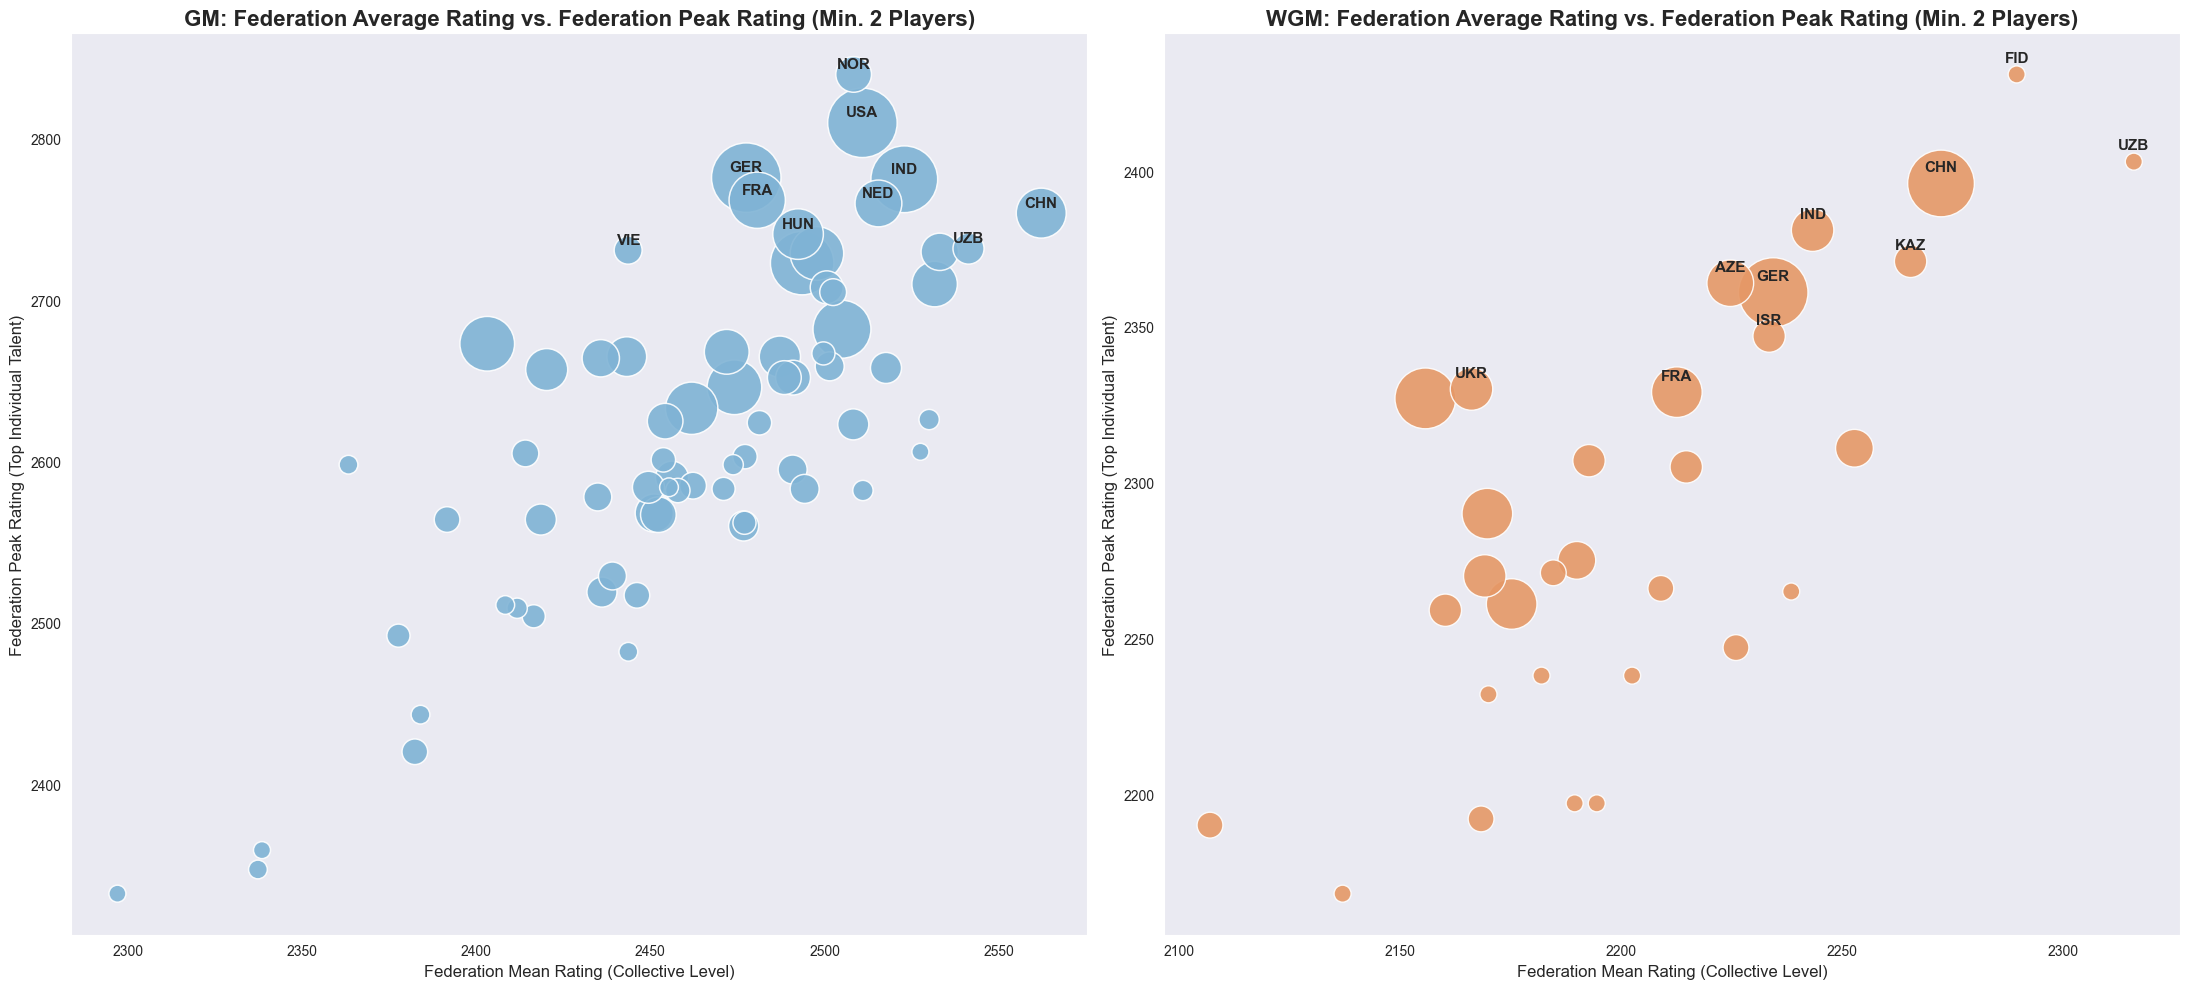

In [82]:
# Filter federations to include only those with more than one player. This removes the "n=1" noise where Max ELO equals Mean ELO
gm_filtered = gm_stats[gm_stats['count'] > 1]
wgm_filtered = wgm_stats[wgm_stats['count'] > 1]

# Prepare Figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
sns.set_style("darkgrid")
gm_color = '#7FB3D5'
wgm_color = '#E59866'

#GM
sizes_gm = gm_filtered['count'] * 8 

sns.scatterplot(data=gm_filtered, x='mean', y='max', 
                size=sizes_gm, sizes=(150, 2500), legend=False,
                color=gm_color, edgecolor='white', alpha=0.9, ax=ax1)

# Label the Top 10 GM federations by Peak Standard Rating (Max ELO)
top_gm = gm_filtered.sort_values(by='max', ascending=False).head(10)
for country in top_gm.index:
    ax1.text(gm_filtered.loc[country, 'mean'], gm_filtered.loc[country, 'max'] + 4,  # Add +4 units vertical offset to prevent labels from overlapping with the scatter points
             country, fontsize=11, fontweight='bold', ha='center')

ax1.set_title('GM: Federation Average Rating vs. Federation Peak Rating (Min. 2 Players)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Federation Mean Rating (Collective Level)', fontsize=12)
ax1.set_ylabel('Federation Peak Rating (Top Individual Talent)', fontsize=12)

#WGM
sizes_wgm = wgm_filtered['count'] * 25 

sns.scatterplot(data=wgm_filtered, x='mean', y='max', 
                size=sizes_wgm, sizes=(150, 2500), legend=False,
                color=wgm_color, edgecolor='white', alpha=0.9, ax=ax2)

# Label the Top 10 WGM federations by Peak Standard Rating (Max ELO)
top_wgm = wgm_filtered.sort_values(by='max', ascending=False).head(10)
for country in top_wgm.index:
    ax2.text(wgm_filtered.loc[country, 'mean'], wgm_filtered.loc[country, 'max'] + 4, # Add +4 units vertical offset to prevent labels from overlapping with the scatter points
             country, fontsize=11, fontweight='bold', ha='center')

ax2.set_title('WGM: Federation Average Rating vs. Federation Peak Rating (Min. 2 Players)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Federation Mean Rating (Collective Level)', fontsize=12)
ax2.set_ylabel('Federation Peak Rating (Top Individual Talent)', fontsize=12)

plt.tight_layout()
plt.show()

### **4.1. Key Insights: Geopolitical Distribution of Chess Excellence**

**Standard Chess: Open Category (Absolute GMs, All Genders)**
* **The Battle of Giants (USA vs. Germany):** Both nations are tied in elite volume with **76 Grandmasters** each. However, the **USA** demonstrates superior systemic depth, ranking **14th** in average ELO compared to Germany's **36th**. Furthermore, the USA holds the **2nd** highest peak ELO globally, while Germany follows in **3rd**.
* **Individual Excellence vs. Volume:** **Norway** hosts the world's highest-rated player despite ranking only **19th** in total player count, illustrating how a single outlier can define a nation's "Ceiling." 
* **Institutional Strength:** While **UAE** leads in average ELO, the result is statistically skewed by a single-player sample. **China** emerges as the true institutional powerhouse, maintaining the **2nd highest average ELO** globally and **the highest average ELO among all federations with more than two GMs** while sustaining a high volume of players (**10th** in GM count with **38 GMs**).

**Standard Chess: Female Category (WGM)**
* **Volume Leaders:** **Germany** leads the world in the number of WGMs (**14**), followed closely by **China** (**13**). However, China displays higher elite efficiency, ranking **3rd** in Peak ELO and **6th** in Average ELO, outperforming Germany in both quality metrics (**7th** in Peak and **14th** in Mean).
* **The FID Factor:** Players registered under the **FID (FIDE)** flag—often due to political or administrative reasons—represent a significant force. Despite having only two players, this group holds the **highest Peak ELO** in the WGM category and ranks **4th** in average strength.
* **Emerging Consistency:** Similar to the open category, small samples (like Canada's single player) can inflate rankings. When considering federations with multiple players, **Uzbekistan** stands out as a high-performance hub, holding the **2nd** highest average ELO and the **2nd** highest peak rating among nations with at least two WGMs.


## 5. Format Synergy: Cross-Discipline Rating Correlation

### 5.1.1 Introduction
In modern chess, top-tier players typically compete across three distinct time formats: **Standard, Rapid, and Blitz**. While the fundamental rules of the game remain the same, the cognitive demands and strategic requirements shift significantly as time controls decrease.

This section explores the **synergy** between these ratings to determine the degree of "universal" proficiency among the elite. To ensure a meaningful statistical analysis, **this correlation study focuses exclusively on players with active ratings (Rating > 0) in all three formats.** By excluding "zero-rating" entries—which represent a lack of official activity rather than a lack of skill, we can accurately measure:

* **Correlation Strength:** Does a high rating in Standard chess guarantee a high ranking in faster formats when the player is active in both?
* **Rhythm-Specific Specialists:** Are there significant outliers who excel in Blitz (intuition-based) but underperform in Standard (calculation-based), or vice versa?
* **Multi-Format Versatility:** To what extent is the "Elite Level" a consistent trait across all chess disciplines for the modern professional?

By analyzing the correlation coefficients and scatter distributions of this active subset, we can identify whether the current chess elite is composed of all-around masters or format-specific specialists.

In [83]:
active_all = elite[
    (elite['standard_rating'] > 0) &
    (elite['rapid_rating'] > 0) &
    (elite['blitz_rating'] > 0) 
].copy()

print(f"Original elite: {len(elite)} rows")
print(f"Elite with all 3 ratings: {len(active_all)} rows")

corr_matrix = active_all[['standard_rating', 'rapid_rating', 'blitz_rating']].corr()
corr_matrix

Original elite: 1476 rows
Elite with all 3 ratings: 1351 rows


,standard_rating,rapid_rating,blitz_rating
standard_rating,1.000,0.874,0.877
rapid_rating,0.874,1.000,0.920
blitz_rating,0.877,0.920,1.000


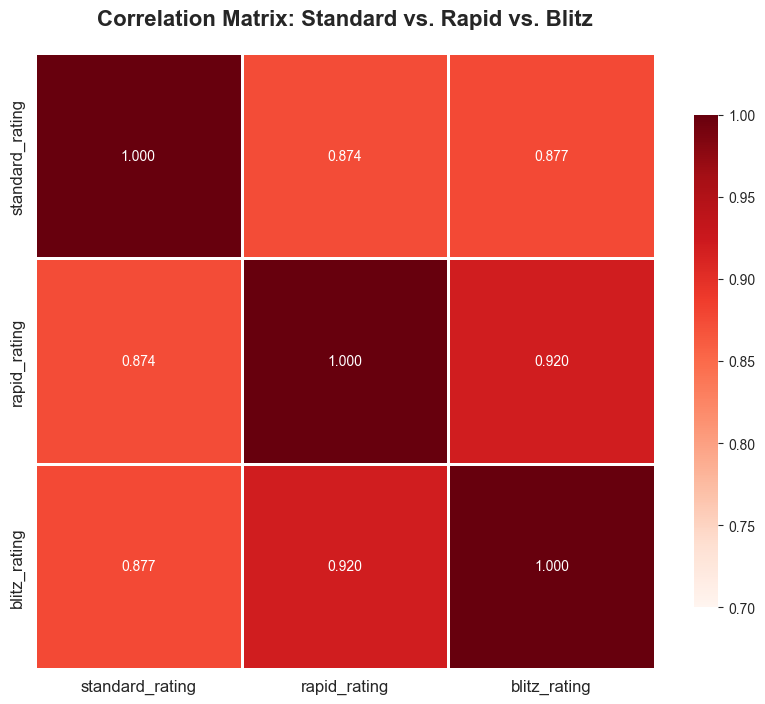

In [84]:
plt.figure(figsize=(10, 8))
sns.set_style("dark") 

sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='Reds', 
            linewidths=1, cbar_kws={"shrink": .8}, vmin=0.7, vmax=1.0)

plt.title('Correlation Matrix: Standard vs. Rapid vs. Blitz', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#### 5.1.2. The Synergy of Excellence: Unified Mastery Across Formats

The correlation matrix reveals a **high degree of synergy** between all time controls, suggesting that elite chess proficiency is a universal trait rather than a fragmented one. The data indicates that mastery in one format is a powerful predictor of success in the others:

* **Rapid vs. Blitz (0.92):** This is the strongest correlation in the dataset. A coefficient of 0.92 indicates a nearly perfect linear relationship, showing that at the elite level, "Speed Chess" (Rapid and Blitz) constitutes a singular, highly consistent skill set.
* **Standard vs. Blitz (0.88):** Despite the drastic difference in time controls—transitioning from hours of deep calculation to seconds of intuition—the correlation remains remarkably high. 
* **Standard vs. Rapid (0.87):** The link between Classical and Rapid chess is equally robust. There is no statistical evidence to suggest that the cognitive demands of long-form chess hinder a player's performance in faster formats.

**Conclusion:** These figures confirm that modern chess excellence is characterized by **Universal Mastery**. The elite landscape is dominated by players whose fundamental understanding of the game transcends the constraints of the clock. A high rating in any single format serves as a reliable statistical guarantee of high performance across the entire competitive spectrum.

### 5.2.1. Title-Based Correlation: Assessing Stability Across Tiers

To ensure statistical significance, this section analyzes the correlation between formats by comparing the two primary elite tiers: **Grandmasters (GM)** and **Woman Grandmasters (WGM)**. 

Due to the vast difference in sample sizes between Male GMs ($N \approx 1271$) and Female GMs ($N = 31$), segmenting strictly by sex would introduce excessive variance in the smaller group. By grouping players under the **GM (Absolute)** and **WGM (Female-specific)** titles, we can more reliably investigate if reaching the highest technical threshold in chess requires a more synchronized performance across time controls.

**The core objectives of this title-based analysis are:**

* **Hierarchy vs. Versatility:** To test if the absolute GM title implies a tighter correlation between Standard and Fast chess than the WGM title.
* **Sample Robustness:** To mitigate the impact of outliers by maintaining professional categories with sufficient active populations.
* **Skill Transferability:** To determine if the "Universal Mastery" observed in previous sections is more prevalent in one of the two titles of professional chess.
* **Active Participation Filter:** As in previous steps, only players with ratings greater than 0 in all three formats are considered to avoid statistical dilution.

In [85]:
# Create a function that returns the selected title correlation
def get_corr(title, df=active_all, column='title', formats=['standard_rating', 'rapid_rating', 'blitz_rating']):
    correlation = df[df[column] == title][formats].corr()
    return correlation

gm_corr = get_corr('GM')
wgm_corr = get_corr('WGM')
wgm_corr

# Extract the different pairs
comparison_data = {
    'Format Combination': ['Standard vs. Rapid', 'Standard vs. Blitz', 'Rapid vs. Blitz'],
    'GM (Absolute)': [
        gm_corr.loc['standard_rating', 'rapid_rating'],
        gm_corr.loc['standard_rating', 'blitz_rating'],
        gm_corr.loc['rapid_rating', 'blitz_rating']
    ],
    'WGM (Female-only)': [
        wgm_corr.loc['standard_rating', 'rapid_rating'],
        wgm_corr.loc['standard_rating', 'blitz_rating'],
        wgm_corr.loc['rapid_rating', 'blitz_rating']
    ]
}

titles_corr_comp = pd.DataFrame(comparison_data)
titles_corr_comp['Difference'] = titles_corr_comp['GM (Absolute)'] - titles_corr_comp['WGM (Female-only)']

# Apply a colorblind-friendly and low-brightness palettes 
corr_styled = (
    titles_corr_comp.round(3)
    .style.background_gradient(cmap='rocket_r', axis=None, subset=['GM (Absolute)', 'WGM (Female-only)'])
    .background_gradient(subset='Difference', cmap='BrBG')
    .format(precision=3)
)
corr_styled

,Format Combination,GM (Absolute),WGM (Female-only),Difference
0,Standard vs. Rapid,0.776,0.731,0.046
1,Standard vs. Blitz,0.789,0.684,0.105
2,Rapid vs. Blitz,0.854,0.786,0.068


#### **5.2.2. Title-Based Correlation Analysis: The Mastery Gap**

By segmenting the correlation analysis by professional title, a distinct trend emerges regarding how skill is synchronized across formats. The data indicates that **Grandmasters (Absolute) demonstrate a higher degree of cross-format synergy than Woman Grandmasters (WGM)**.

* **Standard vs. Blitz (Gap: 0.105):** This is the most significant divergence found in the study. While GMs maintain a robust correlation of 0.789 between their classical and blitz ratings, WGMs show a lower coefficient of 0.684. This suggests that the "Standard" calculation of a GM is more tightly integrated with their "Blitz" intuition than in the WGM tier.
* **Rapid vs. Blitz (Gap: 0.068):** This remains the strongest correlation for both groups, yet it is notably higher for GMs (0.854) than for WGMs (0.786). Proficiency in one speed format is a more reliable predictor of success in the other for the absolute elite.
* **Standard vs. Rapid (Gap: 0.046):** Even in the transition from classical to rapid play, GMs exhibit more consistent performance levels (0.776) compared to the WGM group (0.731).

**Key Insight:** The data suggests that the **absolute Grandmaster title** acts as a benchmark for "Universal Mastery." While both groups are highly skilled, the higher correlation coefficients among GMs indicate that as a player reaches the highest ELO thresholds, their performance becomes more uniform across all time controls. In contrast, the WGM group exhibits a slightly higher degree of **format independence**, where proficiency in one discipline does not translate as strictly to the others.

> **Statistical Note on Correlation Deltas:** Although the observed differences between groups range from 0.046 to 0.105, their significance lies in the **consistency of the trend** rather than the numerical magnitude. In all three format combinations, the GM group maintains a higher correlation, suggesting a systemic pattern of skill synchronization. Furthermore, when considering the Coefficient of Determination ($r^2$), a delta of 0.10 in correlation represents a substantial difference in "explained variance," indicating that a GM's performance is statistically more predictable across time controls than that of the WGM group.

### **5.3. Identification of Profiles: Format Specialists vs. Universal All-Rounders**

Following the discovery of high correlation coefficients and the "Universal Mastery" trend across the elite, this subsection focuses on identifying the specific players who represent the extremes of these statistical patterns. By calculating the **Standard Deviation (STD)** across the three ELO ratings (Standard, Rapid, and Blitz) for each active player, we categorize the elite into two distinct profiles based on their rating consistency:

* **The Top 10 Format Specialists:** Players with the highest variance between their ratings. Despite the general trend toward versatility, these individuals show a marked deviation, excelling significantly in one specific category while maintaining a different relative standing in others.
* **The Top 10 Universal All-Rounders:** Players with the lowest variance. These individuals represent the pinnacle of the "Universal" profile, maintaining a near-identical level of excellence across all time controls and defining the highest standard of competitive balance.

In [108]:
# Calculate players elo std
active_all['elo_std'] = active_all[['standard_rating', 'rapid_rating', 'blitz_rating']].std(axis=1)

# Select the top 5 chess format specialist (high elo std)
top_10_specialists = active_all.sort_values(by='elo_std', ascending=False).head(10).reset_index(drop=True)
top_10_specialists_styled = (top_10_specialists.style
                             .background_gradient(subset=['standard_rating', 'rapid_rating', 'blitz_rating'], axis=1, cmap='RdYlGn')
                             .format(precision=3)
)                          
top_10_specialists_styled

,fideid,name,country,sex,title,standard_rating,standard_games,rapid_rating,rapid_games,blitz_rating,blitz_games,birthday,detailed_title,elo_std,avg_elo,age,age_group
0,4104358,"Gavrilov, Alexei",RUS,M,GM,2315,0,1877,25,2257,0,1960,GM Male,237.910,2149.670,65,60+ (Advanced Senior Tier)
1,4117301,"Cherniaev, Alexander",ENG,M,GM,2268,10,2296,0,2603,0,1969,GM Male,185.857,2389.000,56,50-59 (Senior Tier)
2,25073230,Rakshitta Ravi,IND,F,WGM,2381,0,2082,0,2218,0,2005,WGM,149.703,2227.000,20,20-29 (Early Career)
3,415804,"Wadsworth, Matthew J",ENG,M,GM,2490,11,2369,0,2214,0,2000,GM Male,138.349,2357.670,25,20-29 (Early Career)
4,5055903,"Srija, Seshadri",IND,F,WGM,2251,14,1995,0,2034,0,1997,WGM,137.929,2093.330,28,20-29 (Early Career)
5,2802341,"Yudasin, Leonid",ISR,M,GM,2255,0,2499,0,2466,0,1959,GM Male,132.380,2406.670,66,60+ (Advanced Senior Tier)
6,916366,"Stojanovic, Mihajlo",SRB,M,GM,2395,3,2432,0,2636,0,1977,GM Male,129.786,2487.670,48,40-49 (Late Career)
7,12401358,"Nguyen, Duc Hoa",VIE,M,GM,2432,18,2271,7,2179,8,1989,GM Male,128.059,2294.000,36,30-39 (Mid Career)
8,5013623,"Gomes, Mary Ann",IND,F,WGM,2243,9,2279,0,2048,0,1989,WGM,124.286,2190.000,36,30-39 (Mid Career)
9,922900,"Sedlak, Nikola",SRB,M,GM,2394,19,2640,0,2528,0,1983,GM Male,123.164,2520.670,42,40-49 (Late Career)


In [110]:
top_10_balanced = active_all.sort_values(by='elo_std', ascending=True).head(10).reset_index(drop=True)
top_10_balanced_styled = (
    top_10_balanced.style
    .highlight_max(subset=['standard_rating', 'rapid_rating', 'blitz_rating', 'birthday'], color='teal')
    .format(precision=3)
    .highlight_min(subset='elo_std', color='purple')
)
top_10_balanced_styled

,fideid,name,country,sex,title,standard_rating,standard_games,rapid_rating,rapid_games,blitz_rating,blitz_games,birthday,detailed_title,elo_std,avg_elo,age,age_group
0,13900544,"Khruschiov, Alexey",MDA,M,GM,2273,19,2273,9,2273,0,1982,GM Male,0.000,2273.000,43,40-49 (Late Career)
1,1048333,"Vrolijk, Liam",NED,M,GM,2518,11,2521,0,2520,0,2002,GM Male,1.528,2519.670,23,20-29 (Early Career)
2,13707647,"Makhnev, Denis",KAZ,M,GM,2532,4,2529,4,2532,0,2000,GM Male,1.732,2531.000,25,20-29 (Early Career)
3,4650891,"Naiditsch, Arkadij",BUL,M,GM,2574,0,2574,14,2577,0,1985,GM Male,1.732,2575.000,40,40-49 (Late Career)
4,2901188,"Petkov, Vladimir",BUL,M,GM,2438,8,2433,0,2436,0,1971,GM Male,2.517,2435.670,54,50-59 (Senior Tier)
5,1500058,"Ostenstad, Berge",NOR,M,GM,2420,2,2423,0,2426,0,1964,GM Male,3.000,2423.000,61,60+ (Advanced Senior Tier)
6,44155573,"Murzin, Volodar",FID,M,GM,2648,2,2642,0,2647,0,2006,GM Male,3.215,2645.670,19,Under 20 (Junior Prodigies)
7,5101174,"Gonzalez Garcia, Jose",ESP,M,GM,2437,0,2440,0,2432,0,1973,GM Male,4.041,2436.330,52,50-59 (Senior Tier)
8,24171735,"Drygalov, Andrey",RUS,M,GM,2431,0,2428,9,2436,11,1999,GM Male,4.041,2431.670,26,20-29 (Early Career)
9,14200082,"Barsov, Alexei",UZB,M,GM,2318,0,2311,0,2318,7,1966,GM Male,4.041,2315.670,59,50-59 (Senior Tier)


### **5.3.1. Technical Equilibrium: Performance Stability Analysis**

The identification of universal profiles requires a simultaneous evaluation of rating averages and variance. While low standard deviation values indicate structural consistency, the absolute ELO level determines the competitive tier of such stability. This dual-metric approach differentiates between players who maintain identical ratings at lower thresholds and those who achieve technical equilibrium at the highest levels of professional chess.

By sorting the dataset by **Average ELO** in descending order and **Standard Deviation** in ascending order, the analysis isolates the "High-Performance All-Rounders." The objective of this methodology is to identify the competitors who demonstrate the most robust skill synchronization without compromising their standing within the global elite.

In [88]:
active_all['avg_elo'] = active_all[['standard_rating', 'rapid_rating', 'blitz_rating']].mean(axis=1).round(2)

best_balanced = active_all.sort_values(by=['avg_elo', 'elo_std'], ascending=[False, True]).head(10).reset_index(drop=True)
best_balanced


,fideid,name,country,sex,title,standard_rating,standard_games,rapid_rating,rapid_games,blitz_rating,blitz_games,birthday,detailed_title,elo_std,avg_elo
0,1503014,"Carlsen, Magnus",NOR,M,GM,2840,1,2824,0,2881,0,1990,GM Male,29.400,2848.33
1,2016192,"Nakamura, Hikaru",USA,M,GM,2810,5,2732,0,2838,0,1987,GM Male,54.930,2793.33
2,12573981,"Firouzja, Alireza",FRA,M,GM,2762,0,2754,0,2813,0,2003,GM Male,32.005,2776.33
3,2020009,"Caruana, Fabiano",USA,M,GM,2795,0,2751,0,2751,0,1992,GM Male,25.403,2765.67
4,4168119,"Nepomniachtchi, Ian",RUS,M,GM,2723,2,2762,0,2801,0,1990,GM Male,39.000,2762.00
5,13300474,"Aronian, Levon",USA,M,GM,2729,8,2756,0,2774,0,1982,GM Male,22.650,2753.00
6,5202213,"So, Wesley",USA,M,GM,2753,2,2702,0,2790,0,1993,GM Male,44.185,2748.33
7,8603677,"Ding, Liren",CHN,M,GM,2734,0,2747,7,2757,0,1992,GM Male,11.533,2746.00
8,35009192,Erigaisi Arjun,IND,M,GM,2775,10,2714,4,2749,0,2003,GM Male,30.610,2746.00
9,14204118,"Abdusattorov, Nodirbek",UZB,M,GM,2732,4,2717,2,2768,0,2004,GM Male,26.211,2739.00


#### **5.3.2. Conclusions: Specialists, All-Rounders, and High-Performance Profiles**

The comparative analysis of the top 10 individuals across these three categories identifies distinct technical and demographic patterns within the elite chess population.

##### **1. The Specialist Profile**
* **Format Distribution:** Among the top 10 specialists, the distribution shows a preference for specific time controls: **5 focus on Standard**, **3 on Rapid**, and **2 on Blitz**.
* **Metric Extremes:** **Alexey Gavrilov (RUS)** is the primary outlier with a standard deviation of **237**. His profile shows a 438-point differential between his Standard (2315) and Rapid (1877) ratings.
* **Demographics:** This group includes **3 female players** (ranking 3rd, 5th, and 9th), all holding the **WGM** title and representing the **Indian Federation (IND)**. 
* **Age Factor:** 20% of specialists were born in the 21st century (2000 and 2005), indicating that extreme format specialization is more prevalent among established players.

##### **2. The General All-Rounder Profile (Lowest Variance)**
* **Absolute Consistency:** **Alexey Khrushchiov** is the benchmark for absolute stability with a **0.00 standard deviation**. However, this equilibrium is maintained at a rating of **2273 ELO**, which is 79 points above the study's inclusion threshold.
* **High-Tier Stability:** **Volodar Murzin** (born 2006) represents the most consistent high-rated player in this category, with a standard deviation of **3.21** and a Standard rating of **2648**.
* **Demographics:** The top 10 in this category are **100% male**. While no single federation dominates, **Bulgaria (BUL)** appears twice. 30% of these players were born between 2000 and 2006.

##### **3. The High-Performance All-Rounder Profile (Top 10 by Average ELO)**
This group identifies players who maintain elite-level ratings while minimizing variance across all formats.

* **Performance Thresholds:** All members of this top 10 maintain an **Average ELO exceeding 2700**. All individuals are **Male Grandmasters (GM)**.
* **The 2800 Benchmark:** **Magnus Carlsen (NOR)** is the only player in the dataset with an Average ELO exceeding the 2800 threshold (**2848 Avg ELO**), maintaining a standard deviation of **29.40**.
* **Metric Extremes within the Elite:**
    * **Lowest Variance:** **Ding Liren (CHN)** exhibits the highest stability in this tier with a standard deviation of **11.53** and an Average ELO of **2746** (Rank 8).
    * **Highest Variance:** **Hikaru Nakamura (USA)** records the highest standard deviation in this subgroup (**54.93**) with an Average ELO of **2793** (Rank 2).
* **Geographic Concentration:** The **United States (USA)** represents 40% of this top 10 list, appearing 4 times.
* **Age Distribution:** The group is primarily composed of players born in the 1990s (6/10), followed by the early 2000s (3/10: born in 2003, 2003, and 2004). Nakamura (born 1987) is the oldest player in this high-performance selection. The age variable will be explored deeper later in the analysis.

### **5.4. Population Segmentation: Percentile-Based Outlier Detection**

To categorize the elite population beyond the Top 10 rankings, the analysis applies a rigorous segmentation based on **Percentiles**. This methodology is selected to address the high cross-format correlation observed in Section 5.2, which skews the rating variability distribution toward low values.

* **Extreme Specialization Threshold (95th Percentile):** A "Format Specialist" is defined as any player whose `elo_std` falls within the top 5% of the population. These individuals represent a significant deviation from the prevailing skill synergy, exhibiting high volatility across time controls.
* **Technical Equilibrium Threshold (5th Percentile):** "High-Consistency All-Rounders" are defined as those in the bottom 5% of the volatility distribution. This threshold isolates the most refined cases of "Universal Mastery," including profiles with absolute stability (0.00 STD).

**Objective:** This segmentation quantifies the prevalence of extreme profiles within the FIDE ecosystem. By utilizing percentiles, the analysis ensures that both "Specialists" and "High-Consistency All-Rounders" represent an equivalent degree of statistical rarity.

In [89]:
# Calculate thresholds based on percentiles (Top 5% and Bottom 5%)
upper_threshold = active_all['elo_std'].quantile(0.95)
lower_threshold = active_all['elo_std'].quantile(0.05)

# Identify extreme profiles using percentile-based filtering
extreme_specialists = active_all[active_all['elo_std'] >= upper_threshold].copy()
high_consistency_all_rounders = active_all[active_all['elo_std'] <= lower_threshold].copy()

print(f"Upper Threshold (Specialists - 95th Percentile): {upper_threshold:.2f}")
print(f"Lower Threshold (High-Consistency - 5th Percentile): {lower_threshold:.2f}")
print(f"Total Extreme Specialists found: {len(extreme_specialists)}")
print(f"Total High-Consistency All-rounders found: {len(high_consistency_all_rounders)}")

Upper Threshold (Specialists - 95th Percentile): 87.21
Lower Threshold (High-Consistency - 5th Percentile): 9.93
Total Extreme Specialists found: 68
Total High-Consistency All-rounders found: 68


In [90]:
# Create an 'age' column 
extreme_specialists['age'] = 2025 - extreme_specialists['birthday']
high_consistency_all_rounders['age'] = 2025 -high_consistency_all_rounders['birthday']


def get_stats(df):
    '''This functions returns the average mean, the top country and the average global elo from a df'''
    avg_age = df['age'].mean()
    fed_counts = df['country'].value_counts()
    top_fed_tuple = (fed_counts.index[0], fed_counts.iloc[0])
    avg_global_elo = df['avg_elo'].mean()
    return avg_age, top_fed_tuple, avg_global_elo

spec_age, spec_fed, spec_avg_elo = get_stats(extreme_specialists)
cons_age, cons_fed, cons_avg_elo = get_stats(high_consistency_all_rounders)

# Create a dictionary with the calculated metrics
comparison_dic = {
    "Metric": ["Global Average ELO", "Mean Birth Year", "Dominant Federation"],
    "Extreme Specialists": [
        f"{spec_avg_elo:.2f}", 
        f"{spec_age:.1f}", 
        f"{spec_fed[0]} ({spec_fed[1]})"
    ],
    "High-Consistency All-Rounders": [
        f"{cons_avg_elo:.2f}", 
        f"{cons_age:.1f}", 
        f"{cons_fed[0]} ({cons_fed[1]})" 
    ]
}

# Convert to DataFrame for visualization
comparison_table = pd.DataFrame(comparison_dic).set_index("Metric")

# Display the table
comparison_table

,Extreme Specialists,High-Consistency All-Rounders
Metric,,
Global Average ELO,2361.51,2470.72
Mean Birth Year,35.4,41.4
Dominant Federation,IND (10),RUS (5)


#### **5.4.1. Statistical Rarity: Specialists vs. High-Consistency All-Rounders**

By applying a **percentile-based segmentation** (5th and 95th percentiles), the analysis isolates the true anomalies within the dataset. This symmetrical approach reveals the distribution of professional profiles at the extreme ends of the variability spectrum:

* **The Extreme Specialists (Top 5%):** We identified **68 players** who qualify as statistical outliers by exceeding the **87.21** `elo_std` threshold. These individuals represent the pinnacle of format dependency, exhibiting a level of divergence that suggests their competitive strength is heavily anchored to specific time controls.
* **The High-Consistency All-Rounders (Bottom 5%):** Simultaneously, **68 players** were identified with a rating variance equal to or lower than **9.93**. These individuals exhibit near-perfect synchronization across Standard, Rapid, and Blitz formats, representing the highest degree of technical equilibrium in the dataset.

#### **Conclusion: The Performance-Consistency Correlation**

The segmentation analysis yields three primary technical findings:

1.  **Strength and Stability Correlation:** High-Consistency All-Rounders maintain a significantly higher **Global Average ELO (2470.72)** compared to Specialists (**2361.51**). This suggests that technical equilibrium across formats is a characteristic of higher-tier competitive profiles.
2.  **The Experience Factor:** The **High-Consistency** group is older on average (**41.4 years**) than the **Specialist** group (**35.4 years**). This indicates that format synchronization may be a byproduct of competitive maturity or long-term professional stability rather than a trait exclusive to younger cohorts. We will explore the age avariable in a subsequent section.
3.  **Geographic Specialization:** There is a notable geographic concentration of specialists within the **Indian Federation (IND)**, accounting for **14.7%** of the specialist outliers. In contrast, the **Russian Federation (RUS)** leads the high-consistency group but with a lower concentration (**7.3%**).

In summary, while the **All-Rounder** represents a more refined and higher-rated professional model, the **Specialist** emerges as a younger, geographically concentrated exception that deviates from the elite's general trend toward universalism.

### 5.5. The Universal Elite: Top 10 Intersection Analysis

After analyzing individual volatility, we shift our focus to the **global dominance** of the elite. This section investigates whether the highest-rated players in the world manage to maintain their status across all three time controls (Standard, Rapid, and Blitz).

Given the low correlation coefficients observed earlier ($r \approx 0.33$), we aim to verify if being a "Top 10" player in one format statistically translates to dominance in the others.

#### **Analytical Goals:**
* **Identify Format Hegemons:** Players who appear exclusively in only one Top 10 list.
* **The "Universal Intersection":** Identify the rare individuals who appear in all three Top 10 rankings simultaneously.

**Key Question:** Is the "World Champion" profile necessarily an all-rounder, or can one dominate the world rankings while being a specialist?

### 5.5. The Universal Elite: Multi-Format Intersection Analysis

This section evaluates global dominance by analyzing the presence of elite practitioners across the three FIDE time controls (Standard, Rapid, and Blitz). The objective is to determine if high-tier performance in a specific format statistically ensures a position in the Top 10 rankings of the others.

**1. Correlation and Consistency**
The data indicates a strong positive correlation between Standard, Rapid, and Blitz ratings. This suggests that the foundational skill set required for classical chess remains a significant predictor of success in faster time controls. The analysis focuses on whether this statistical correlation translates into a physical presence in the Top 10 lists across all categories.

**2. Analytical Objectives**
* **Format Hegemony:** Identification of players whose technical specialization restricts their Top 10 presence to a single time control.
* **Universal Intersection:** Identification of "Universalist" profiles —individuals who maintain a Top 10 position in all three formats simultaneously.
* **Performance Stability:** Assessment of the "World Champion" archetype to determine if absolute dominance requires cross-format universality or if specialized dominance is sufficient to lead the global circuit.

**3. Theoretical Framework**
The intersection analysis serves as a stress test for the correlation coefficients. While a high $r$ value suggests a general trend across the population, the Top 10 intersection identifies if this relationship holds at the extreme upper tail of the distribution.

In [91]:
# Select the three formats
formats = ['standard_rating', 'rapid_rating', 'blitz_rating']

top = []

# Use a for loop to get the top ten players in each format
for i in formats:
    df = elite.sort_values(by=i, ascending=False).head(10)
    top.append(set(df['name']))

# Get the players who appear in the top ten of all three categories
universal_elite = set.intersection(*top)

print(f"Number of players in the Triple Top 10: {len(universal_elite)}")
print(f"Players: {universal_elite}")


Number of players in the Triple Top 10: 3
Players: {'Firouzja, Alireza', 'Carlsen, Magnus', 'Nakamura, Hikaru'}


In [92]:
# We want to see their rankings
elite_ranks = {}

for player in universal_elite:
    player_stats = {}
    for fmt in formats:
        df = elite.sort_values(by=fmt, ascending=False).reset_index(drop=True).head(10)
        position = df[df['name'] == player].index[0]+1
        player_stats[fmt] = position
    elite_ranks[player] = player_stats

elite_ranks = pd.DataFrame(elite_ranks)
elite_ranks.T


,standard_rating,rapid_rating,blitz_rating
"Firouzja, Alireza",6,4,3
"Carlsen, Magnus",1,1,1
"Nakamura, Hikaru",2,9,2


#### **5.5.1. The Universal Elite: Conclusions**

This final analysis identifies the "Universal Elite", these players represent the peak of technical synergy, maintaining a Top 10 position in all three formats simultaneously.

#### **The Triple Crown Holders**
After intersecting the Top 10 sets for Standard, Rapid, and Blitz, only **3 players** out of the entire elite dataset managed to remain in the intersection. Their specific rankings reveal a fascinating pattern of dominance:

| Player | Standard Rank | Rapid Rank | Blitz Rank |
| :--- | :---: | :---: | :---: |
| **Carlsen, Magnus** | **1** | **1** | **1** |
| **Nakamura, Hikaru** | 2 | 9 | 2 |
| **Firouzja, Alireza** | 6 | 4 | 3 |



#### **Key Insights from the Data:**

* **Absolute Hegemony:** **Magnus Carlsen** exhibits a "Perfect Triple Crown," ranking as the #1 player in every single format. This confirms that he is not just a leader, but a statistical anomaly in the history of the game, achieving a 1.0 average rank.
* **The Blitz Correlation:** A striking discovery in this analysis is that these three "Universal" players also happen to be the **Top 3 players in the world Blitz ranking** (Carlsen #1, Nakamura #2, Firouzja #3). This suggests that mastery of ultra-fast decision-making is a core prerequisite for overall format versatility.
* **The Profile of Excellence:** * **Hikaru Nakamura** shows a slight "dip" in Rapid (#9) but maintains a near-perfect symmetry between Standard and Blitz (#2 in both). 
    * **Alireza Firouzja** shows a highly compact "Elite Profile," with all his rankings concentrated in the Top 6, representing the high consistency of the younger generation.
* **Validation of the 'Best Balanced' Metric:** Remarkably, these three players appear in the exact same hierarchy (1, 2, 3) within the **"Best Balanced"** table (Section 5.3.1). This alignment statistically confirms that the highest tier of the FIDE ranking is occupied by individuals who harmonize absolute strength with minimal performance variance.




### 5.6. Section 5 Conclusions: Synthesis of Format Synergy and Performance Profiles

The statistical evaluation of the FIDE elite across Standard, Rapid, and Blitz formats identifies a systemic trend toward universal proficiency. The following points summarize the technical findings:

* **Universal Competency:** Analysis confirms a high degree of synergy between all time controls, suggesting that elite chess proficiency is a unified trait. The strongest correlation exists between Rapid and Blitz ($r = 0.92$), followed by Standard vs. Blitz ($r = 0.88$) and Standard vs. Rapid ($r = 0.87$).

* **Title-Based Synchronization:** Absolute Grandmasters (GM) demonstrate higher cross-format synergy than Woman Grandmasters (WGM). The most pronounced divergence occurs in the Standard vs. Blitz correlation, where GMs ($r = 0.789$) exhibit tighter skill integration compared to the WGM tier ($r = 0.684$).

* **Operational Profiles:** The population is segmented into Specialists (top 5% volatility) and High-Consistency All-Rounders (bottom 5% volatility). High-Consistency practitioners maintain a higher Global Average ELO (2470.72) than Specialists (2361.51), suggesting that technical equilibrium is a characteristic of higher-tier competitive profiles.

* **Demographic and Geographic Trends:** Format synchronization correlates with competitive maturity; the High-Consistency group is older on average (41.4 years) than the Specialist group (35.4 years). Geographic analysis identifies a concentration of Specialists within the Indian Federation (14.7%), while the Russian Federation leads in high-consistency profiles (7.3%).

* **The Universalist Peak:** While approximately 90% of the elite function as balanced practitioners, absolute multi-format dominance is restricted to a "Universal Elite" of three individuals: Magnus Carlsen, Hikaru Nakamura, and Alireza Firouzja. Magnus Carlsen represents the statistical limit of this synergy, maintaining the #1 rank across all three formats simultaneously.

* **Final Insight:** The professional chess landscape is characterized by a systemic trend toward "Universal Mastery," where foundational understanding of the game transcends clock constraints. While format specialization exists as a statistically rare deviation, the highest levels of global mastery are defined by the ability to maintain performance parity across all competitive categories.


## **6. Age and Generational Performance**

After identifying the "Universal Elite" and the different levels of specialization, we must investigate a primary factor that often dictates performance and format flexibility: **Age.** This section explores whether the "Specialist" and "All-rounder" profiles are a byproduct of a player's generational background.


### **6.1. Analytical Objectives**

* **Temporal Calibration:** Standardize the population age using **2025** as the reference period ($Age = 2025 - birth\_year$) to facilitate the segmentation of generational cohorts.
* **Multi-Format Correlation Analysis:** Quantify the statistical relationship between age and ELO ratings independently for the Standard, Rapid, and Blitz formats to identify format-specific decline or stability.
* **Descriptive Statistics by Cohort:** Calculate the mean, median, and maximum ELO ratings per age group and format to map the performance distribution across the professional lifecycle.
* **Titular Performance Benchmarking:** Analyze the median ELO for each format specifically for Grandmasters (GM) and Woman Grandmasters (WGM), segmented by age group, to identify elite performance peaks.
* **Format Differential Analysis:** Measure the rating delta between Blitz and Standard formats across different age groups to evaluate how speed-based performance degrades or stabilizes over time.
* **Universalist Profile Mapping:** Identify the age and generational cohort of the identified "Universalist" players to determine if total dominance is linked to a specific career stage.
* **Outlier Demographic Investigation:** Conduct a targeted analysis of the **Extreme Specialists** and **High-Consistency All-Rounders** identified in Section 5.4, focusing on their age distribution and cohort concentration to explain the previously observed younger age of specialists.

#### **Methodological Note: Population Selection and Datasets**

To ensure statistical rigor in the generational analysis, this study alternates between two specific data structures:

* **`elite` Dataset (Total Population):** Used to obtain general demographic metrics and descriptive statistics (Mean, Median, Maximums) representing the entire professional ecosystem.
* **`active_all` Dataset (Filtered Population):** Used exclusively for correlation analysis and format differentials. By including only players active in all three disciplines, the statistical noise of incomplete profiles is eliminated from the coefficients calculations.

**Objective:** To cross-reference the representativeness of the global dataset with the technical precision of the active subset to validate performance trends against age.

**Research Context:** Following the findings in Section 5.4.2—where Extreme Specialists exhibited a lower mean age than High-Consistency All-Rounders—this section moves beyond initial hypotheses to empirically map how age influences competitive profiles. The objective is to determine if technical specialization is a developmental phase or a generational trait, and how format-specific mastery evolves from the junior to the veteran stages.

In [93]:
# Create an 'age' column
elite['age'] = 2025 - elite['birthday'] 
active_all['age'] = 2025 - active_all['birthday'] 

elite['age'].describe()



count    1476.000
mean       41.855
std        14.452
min        14.000
25%        31.000
50%        40.000
75%        53.000
max        84.000
Name: age, dtype: float64

#### **6.1.1 Age Demographics: A Broad Generational Span**

Initial descriptive statistics for the `age` column (calculated as of 2025) reveal a highly diverse competitive landscape. The age distribution suggests that chess remains a sport where multiple generations compete on equal footing, though their performance across formats may differ.

#### **Key Demographic Metrics:**
* **Average Age:** 41.1 years.
* **Median Age:** 40 years.
* **Standard Deviation:** 14.45 years (indicating a wide generational spread).
* **The Extremes:** The dataset captures a 70-year gap between the youngest prodigy (**14 years old**) and the most senior veteran (**84 years old**).

| Metric | Value |
| :--- | :---: |
| Mean | 41.1 |
| Std Dev | 14.45 |
| Min | 14 |
| 50% (Median) | 40 |
| Max | 84 |

##### **Initial Observations:**
The fact that the mean and median are so close (41 vs 40) suggests a relatively **symmetrical distribution** of ages in the elite, without extreme skewness. However, the high standard deviation justifies a deeper look into how these different age groups perform in specific formats.

In [94]:
# Add an 'age_group' column to both dfs
bins = [0, 19, 29, 39, 49, 59, 100]

labels = [
    'Under 20 (Junior Prodigies)',
    '20-29 (Early Career)',
    '30-39 (Mid Career)',
    '40-49 (Late Career)',
    '50-59 (Senior Tier)',
    '60+ (Advanced Senior Tier)'
]

elite['age_group'] = pd.cut(x=elite['age'], bins=bins, labels=labels, include_lowest=True, right=True, ordered=True)

active_all['age_group'] = pd.cut(x=active_all['age'], bins=bins, labels=labels, include_lowest=True, right=True, ordered=True)
active_all['age_group'].value_counts()

elite['age_group'].value_counts()

age_group
30-39 (Mid Career)             395
40-49 (Late Career)            300
20-29 (Early Career)           289
50-59 (Senior Tier)            233
60+ (Advanced Senior Tier)     213
Under 20 (Junior Prodigies)     46
Name: count, dtype: int64

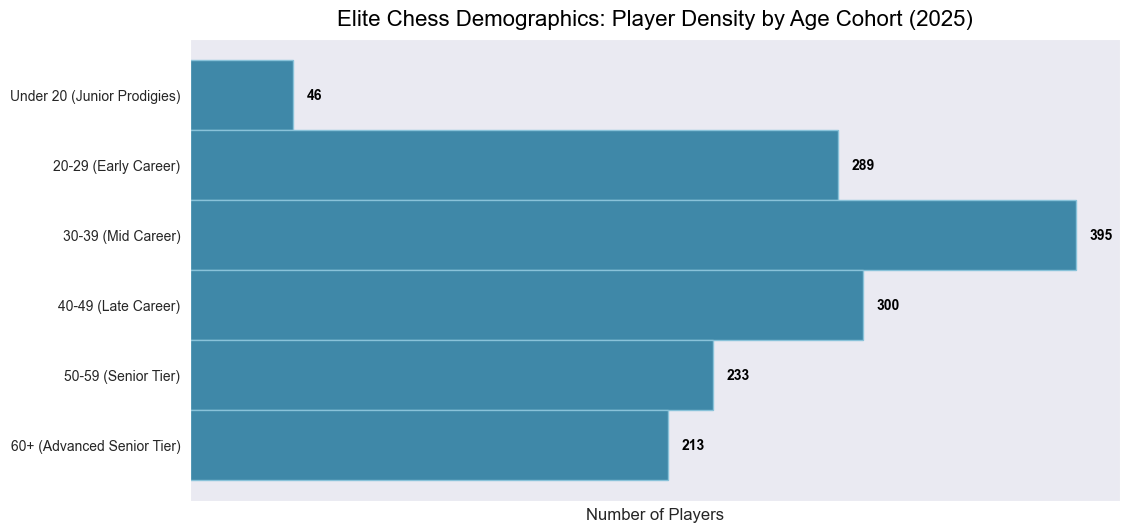

In [95]:
# Create a histogram to visualize the distribution based on the complete dataset (elite)
sns.set_style('dark')
plt.figure(figsize=(12,6))
ax = sns.histplot(elite, y='age_group', color='#2c7da0', edgecolor='#89c2d9', alpha=0.9)
# Annotate the values on each bar
ax.bar_label(ax.containers[0], padding=10, fontsize=10, color='black', fontweight='bold')
plt.title('Elite Chess Demographics: Player Density by Age Cohort (2025)', fontsize=16, pad=10, color='Black')
plt.ylabel('')
plt.xlabel('Number of Players', fontsize=12)
# Remove x ticks to avoid redundancy 
ax.set_xticklabels([])
ax.set_xticks([])
plt.show()


In [96]:
age_group_perc = (elite['age_group'].value_counts(normalize=True).sort_index()) *100
age_group_perc

age_group
Under 20 (Junior Prodigies)     3.117
20-29 (Early Career)           19.580
30-39 (Mid Career)             26.762
40-49 (Late Career)            20.325
50-59 (Senior Tier)            15.786
60+ (Advanced Senior Tier)     14.431
Name: proportion, dtype: float64

#### **6.1.2. Executive Summary of Age Distribution**

The generational analysis reveals a distribution that is heavily weighted towards experienced maturity rather than early youth. This "demographic bulge" in the middle-age categories provides a clear picture of the professional lifespan within the chess elite.

#### **Key Statistical Findings:**

| Age Group | Player Count | Percentage | Status |
| :--- | :---: | :---: | :--- |
| **30-39 (Mid Career)** | **395** | **26.76%** | **Dominant Peak** |
| **40-49 (Late Career)** | 300 | 20.32% | High Density |
| **20-29 (Early Career)** | 289 | 19.57% | Stable Core |
| **50-59 (Senior Tier)** | 233 | 15.78% | Significant Presence |
| **60+ (Advanced Senior Tier)** | 213 | 14.43% | Veteran Stability |
| **Under 20 (Junior Prodigies)** | 46 | 3.11% | Rare Elite Entry |



#### **Deep Dive Insights:**

* **The 30s Hegemony:** The **30-39 cohort** is the undisputed center of gravity for the FIDE elite. Representing over a quarter of the entire dataset, this group likely combines the peak of physical calculation speed with deep strategic experience accumulated over two decades.
* **The Junior Barrier:** The most striking data point is the scarcity of players **Under 20 (3.11%)**. This suggests that entering the elite ecosystem before age 20 is a feat reserved for extraordinary prodigies, debunking the myth that the modern elite is solely dominated by "new kids on the block."
* **Veteran Resilience:** There is a remarkable stability in the cohorts from age 40 to 60+. The fact that the **Advanced Senior Tier (60+)** accounts for **14.43%** of the elite—nearly five times more than the Juniors—proves that chess mastery is one of the most durable professional skills, allowing for competitive longevity well into retirement age.
* **Plateau Distribution:** Between ages 20 and 60, the distribution remains relatively robust. This indicates that once a player reaches the elite level, they tend to maintain their status for several decades, creating a "plateau" of high-level competition before a gradual decline after age 60.

**Conclusion:** The elite chess world is not a "young man's game" in terms of population density; it is a mature ecosystem where the 30-49 age range holds nearly 47% of all active elite positions.

### **6.2. The Impact of Aging on Competitive Ratings**

After defining the demographic structure of the elite, we must address the core question of this research: **How does age influence performance across different time controls?** It is often hypothesized that younger players excel in faster formats due to superior calculation speed and reflexes, while older players maintain their edge in Classical chess through experience and deep strategic understanding.

In this section, we transition from demographic density to **performance metrics** by analyzing the relationship between age and ELO ratings in Standard, Rapid, and Blitz formats.

### **6.2.1. Correlation Analysis: Age vs. Format Performance**

Before segmenting by groups, we will measure the **Pearson Correlation Coefficient ($r$)** to determine the strength and direction of the linear relationship between age and rating. This will provide a high-level view of how aging affects each format:

* **Standard vs. Age:** Does experience compensate for the passage of time?
* **Rapid vs. Age:** The transition point between intuition and deep calculation.
* **Blitz vs. Age:** Testing the "Reflex Decline" hypothesis.



In [97]:
active_all['age'] = 2025 - active_all['birthday']
correlations = active_all[['age', 'standard_rating', 'rapid_rating', 'blitz_rating']].corr()['age'].drop('age')
print("Pearson Correlation with Age:")
correlations

Pearson Correlation with Age:


standard_rating   -0.404
rapid_rating      -0.207
blitz_rating      -0.240
Name: age, dtype: float64

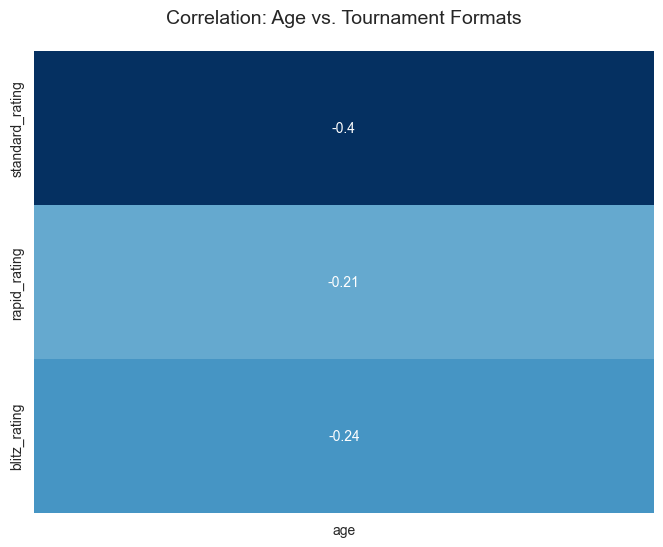

In [98]:
# Compute the correlation matrix for age and performance metrics
corr_matrix = active_all[['age', 'standard_rating', 'rapid_rating', 'blitz_rating']].corr()

# Plot a heatmap to visualize the strength of the relationship
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['age']].drop('age'), annot=True, cmap='RdBu_r', center=0, cbar=False)
plt.title('Correlation: Age vs. Tournament Formats', fontsize=14, pad=20)
plt.show()

#### **6.2.2. Correlation Analysis: Conclusion**

The Pearson correlation analysis provides a quantitative assessment of the relationship between aging and competitive performance. While all three formats exhibit a negative correlation—confirming a general rating decline as age increases—the magnitude of this decay varies significantly across time controls.

#### **Correlation Matrix Results (Full Population):**

| Format | Pearson Coefficient ($r$) | Strength of Relationship |
| :--- | :---: | :--- |
| **Age vs. Standard ELO** | **-0.404** | **Moderate Negative** |
| **Age vs. Blitz ELO** | -0.240 | Weak Negative |
| **Age vs. Rapid ELO** | -0.207 | Weak Negative |



#### **Key Interpretations:**

1. **The Classical Decline:** The strongest negative correlation is identified in **Standard Chess (-0.404)**. This indicates that the classical format—characterized by high endurance requirements and prolonged cognitive load—is the most sensitive to the aging process within the professional elite.
2. **Resilience in Faster Controls:** The correlations for **Blitz (-0.240)** and **Rapid (-0.207)** are notably less severe than in Standard chess. This suggests that "pattern recognition" and accumulated experience may mitigate the decline in faster time controls more effectively than the physical and mental stamina required for long-form games.
3. **Rapid as the Maximum Stability Point:** With a coefficient of **-0.207**, Rapid chess represents the format with the highest statistical stability over time. It functions as an equilibrium point where the decline in calculation speed is most successfully balanced by strategic intuition.

**Technical Conclusion:** The data demonstrates that aging in the chess elite is primarily characterized by a loss of efficiency in long-duration formats. The performance decay in Standard chess is nearly double that of Rapid chess, suggesting that endurance, rather than intuition-based speed, is the primary variable affected by the professional lifecycle.

### **6.3.1. Performance Plateaus by Generation**

Following the correlation, we will analyze the **MEAN, MEDIAN and MAX ELO per Age Group** defined in the previous section. This will allow us to visualize the "Golden Era" of performance and identify the specific decade where ratings in faster formats (Blitz/Rapid) begin to deviate from Standard ratings, creating what we call the **"Efficiency Gap."**

**Objective:** To determine if the "Junior Prodigies" and "Early Career" groups show a statistical dominance in speed-based formats compared to the "Senior" and "Advanced Senior" tiers.

In [99]:
group_stats = elite.groupby('age_group')[['standard_rating', 'rapid_rating', 'blitz_rating']].agg(['mean', 'median', 'max'])

# Apply 'flare' gradient (sequential beige-to-purple) for accessibility, highlight max values in black
gs_highlighted = (group_stats.round(2)
                 .style.background_gradient(cmap='flare')
                 .highlight_max(color='black')
                 .format(precision=2))

gs_highlighted

C:\Users\iarg5\AppData\Local\Temp\ipykernel_436\2038908138.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = elite.groupby('age_group')[['standard_rating', 'rapid_rating', 'blitz_rating']].agg(['mean', 'median', 'max'])


#### **6.3.2. Performance Analysis: The Dominance of Youth and Maturity**

This section evaluates performance using **Mean**, **Median**, and **Maximum** values. The **Median** was prioritized as the primary reliability metric to mitigate the downward bias caused by players with a $0$ rating in Rapid or Blitz formats, ensuring a more accurate representation of each cohort's "typical" player.

#### **Key Insights from the Performance Matrix:**

* **The 30-39 Stronghold:** The **Mid-Career (30-39)** group holds 5 out of 9 possible maximum values. This cohort claims the **Absolute Maximum** in Standard, all three metrics in **Rapid** (Mean, Median, Max), and the **Absolute Maximum** in Blitz. This confirms that the fourth decade of life represents the peak of professional chess capacity across almost all time controls.
* **The Blitz Shift:** The **20-29 (Early Career)** group takes the lead in **Mean and Median for Blitz**. This statistically validates the hypothesis that younger players maintain a slight edge in the fastest format, where reaction time and calculation speed are paramount.
* **The Prodigy Paradox (Under 20):** This group shows the highest **Mean and Median in Standard Rating**. While impressive, this is interpreted as a **Selection Bias**: because this group has the fewest participants ($3.11\%$), it is composed almost exclusively of elite prodigies who have climbed the rankings rapidly, pushing the average higher than the more populated and diverse older groups.
* **The Senior Decline:** The **60+ (Advanced Senior Tier)** consistently shows the lowest values across every single metric and format. This aligns with the **correlation** previously found, marking the inevitable impact of age on elite competitive performance.

**Conclusion:** Performance inversely correlates with age. As players get younger, performance metrics rise across the board, with the 30-39 group acting as the final frontier of peak absolute strength before a steady decline begins.

### **6.3.3. Categorical Validation: Performance Patterns in GM vs. WGM**

To ensure the previous findings are not skewed by title distribution, this sub-section explores whether the age-performance relationship remains consistent across different professional categories. By isolating **Grandmasters (GM)** and **Woman Grandmasters (WGM)**, we aim to verify if the "Peak Performance" and "Senior Decline" patterns are universal traits of the chess elite or if they vary by competitive track.


In [100]:
comparison_table = elite.pivot_table(
    index='age_group',
    columns='title',
    values=['standard_rating', 'rapid_rating', 'blitz_rating'],
    aggfunc='median'
)
comparison_table.round(2).style.background_gradient(cmap='flare').format(precision=2)

C:\Users\iarg5\AppData\Local\Temp\ipykernel_436\2384466538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  comparison_table = elite.pivot_table(


#### **6.3.4. Final Conclusion: Universal Aging Patterns Across Titles**

The comparative analysis between **Grandmasters (GM)** and **Woman Grandmasters (WGM)** reveals a striking consistency in professional chess lifespans. Despite the structural differences in the competitive tracks, the data confirms that the impact of aging on cognitive-sporting performance follows a universal trajectory.

#### **Key Findings on Title Parity:**

* **Consistent Decline:** In both GM and WGM categories, the median ELO across all three time controls (Standard, Rapid, and Blitz) shows a negative correlation with age. This confirms that the physiological and strategic advantages of youth are a shared factor regardless of the specific title held.
* **The "Age 40" Threshold:** The data identifies the **40-49 (Late Career)** age group as the definitive **inflection point**. While the 30s represent the absolute peak of stability and performance, it is upon entering the fifth decade that a synchronized decline begins across all formats. 
* **Format-Agnostic Decay:** Interestingly, this decline is not exclusive to fast formats; it is equally visible in Standard ratings, suggesting that the "40s barrier" marks a shift in both calculation speed and the physical endurance required for elite competition.



**Final Verdict:** The hypothesis of a universal aging pattern is **Validated**. The elite chess ecosystem follows a rigid biological clock where peak performance is sustained until age 39, followed by a measurable and consistent decay starting in the 40-49 cohort, a trend that remains identical for both GM and WGM populations.

### **6.4. The Efficiency Gap**

While the previous sections established a general decline in ratings, they do not account for how the "quality" of play diverges between formats as a player ages. The **Efficiency Gap** is defined as the numerical difference between **Standard ELO** and **Blitz ELO**. 

### **6.4.1. Methodology and Data Sanitization**

To ensure the integrity of this comparison, we have applied the following criteria:

* **Dataset Selection:** This analysis utilizes the original `elite` dataframe rather than the `active_all` subset. This choice accounts for players who hold ratings in specific formats (such as Standard and Blitz) but may lack a Rapid rating. By using the primary dataset and filtering specifically for players with valid Blitz entries, we maximize the sample size for this bilateral comparison.
* **Exclusion of Zero-Rated Players:** Any player with a Blitz rating of $0$ has been excluded from this specific sub-analysis to avoid artificial "gaps" that do not reflect actual skill differences.
* **Gap Calculation:** We calculate the variable $Gap = Standard_{ELO} - Blitz_{ELO}$. A positive gap indicates that a player's classical strength exceeds their speed-chess performance.

**Objective:** To determine if the gap widens significantly in the "Senior" and "Advanced Senior" tiers, statistically proving if the loss of reflexes outpaces the loss of strategic depth.

In [101]:
# Filter out those players who have a 0 ELO in Blitz
active_blizzers = elite[elite['blitz_rating'] > 0].copy()

# Create the column 'rating_gap' to calculate the difference between players' standard_ranting and blitz_rating
active_blizzers['rating_gap'] = active_blizzers['standard_rating'] - active_blizzers['blitz_rating']

# Group by 'age_group' and calculate its mean
gap_by_age = active_blizzers.groupby('age_group')['rating_gap'].mean().round(2)

gap_by_age

C:\Users\iarg5\AppData\Local\Temp\ipykernel_436\1323923421.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gap_by_age = active_blizzers.groupby('age_group')['rating_gap'].mean().round(2)


age_group
Under 20 (Junior Prodigies)    97.09
20-29 (Early Career)           51.50
30-39 (Mid Career)             24.86
40-49 (Late Career)            14.45
50-59 (Senior Tier)            -1.17
60+ (Advanced Senior Tier)     -1.22
Name: rating_gap, dtype: float64

#### **6.4.2. Conclusion: The Senior Intuition vs. Junior Calculation**

The results of the "Efficiency Gap" analysis provide a counter-intuitive revelation that challenges the standard "reflex decline" theory. Instead of widening with age, the gap between Standard and Blitz ratings actually **closes and eventually inverts**.

#### **Data Summary:**
| Age Group | Standard-Blitz Gap (Points) | Trend |
| :--- | :---: | :--- |
| **Under 20 (Junior Prodigies)** | **+97.09** | Significant Standard Superiority |
| **30-39 (Mid Career)** | +24.86 | Balanced Performance |
| **60+ (Advanced Senior)** | **-1.22** | Slight Blitz Superiority |

#### **Interpretative Hypotheses:**

1. **The Intuition Factor:** Younger players rely on deep, exhaustive calculation, which is better rewarded in Standard formats. In contrast, Senior players (50+) leverage decades of **pattern recognition**. This "chess intuition" allows them to maintain a Blitz ELO that is surprisingly resilient, even surpassing their Standard rating.
2. **The Stamina Barrier:** The negative gap in older cohorts suggests that the primary victim of aging is not speed, but **physical endurance**. A 10-minute Blitz game is a sprint that a veteran can still win, but a 5-hour Standard marathon imposes a physical toll that may explain the sharper decline in Classical ELO.
3. **The "Grandmaster Path" Focus:** As hypothesized, younger players prioritize Standard chess as it is the primary vehicle for achieving titles (GM/WGM). Once the professional ceiling is reached, experience allows them to translate that vast knowledge into Blitz, where instinct replaces the need for grueling long-term concentration.
4. **Blitz Survival Bias Hypothesis:** It is highly probable that the senior players (60+) who maintain an active Blitz rating are those who possess intrinsically exceptional mental agility. Players of the same age whose processing speed has significantly declined tend to abandon fast formats to focus exclusively on Standard chess. This effectively leaves only the "veteran specialists" in the sample, artificially stabilizing the median rating for this cohort.

**Final Insight:** The data suggests that while aging negatively impacts all competitive ratings, it appears to be more "merciful" to the intuitive speed and pattern recognition of the veteran than to the grueling computational stamina required for the classical elite. However, this conclusion must be interpreted with caution: the observed resilience in Blitz ratings among senior tiers may not represent the aging process of the general population, but rather a **Survival Bias**, where only the most cognitively agile seniors remain active in fast-paced formats. Thus, the narrowing gap is likely a combination of accumulated "Chess Wisdom" and the natural filtering of the player pool over time.

### **6.5. Demographic Profiling of Performance Archetypes**

After identifying the statistical "outliers" of our dataset—those who exhibit extreme consistency or extreme specialization(see section 5.4)—we must now investigate if these profiles are linked to specific stages of a player's life. By analyzing the age distribution of our most distinct groups, we can observe whether versatility is a youthful trait or if specialization becomes a necessity of age.

### **6.5.1. Comparative Age Analysis: Universalists, All-Rounders, and Specialists**

In this sub-section, we cross-reference our previously defined archetypes (see section 5.4) with their chronological data. We will analyze the age groups of:

1.  **The Universalist Trio:** Examining the age of the 3 players who dominate the Top 10 in all formats (**Magnus Carlsen, Hikaru Nakamura, and Alireza Firouzja**).
2.  **The High-Consistency All-Rounders (Bottom 5th Percentile):** Analyzing the **68 players** identified within the lower 5% of rating variability ($\sigma \le 9.93$). This analysis aims to determine if near-perfect format synchronization clusters within a specific career phase or professional demographic.
3.  **The Extreme Specialists (Top 95th Percentile):** Investigating the **68 players** identified as statistical outliers within the upper 5% of variability ($\sigma > 87.21$). The objective is to establish whether these specialists represent a younger, "unbalanced" cohort or a senior tier that has specialized in specific formats over time.


In [102]:
universalists = elite[elite['name'].isin(universal_elite)]
universalists[['name', 'age', 'age_group']].reset_index(drop=True)

,name,age,age_group
0,"Carlsen, Magnus",35,30-39 (Mid Career)
1,"Firouzja, Alireza",22,20-29 (Early Career)
2,"Nakamura, Hikaru",38,30-39 (Mid Career)


#### **6.5.2. Case Study: The Universalist Trio**

The demographic profile of the only three players capable of maintaining a Top 10 position across all formats aligns with the trends observed in our categorical age analysis:

* **Peak Performance in the 30-39 Bracket:** Both **Magnus Carlsen (35)** and **Hikaru Nakamura (38)** are currently within the "Mid-Career" group. Their presence at the top suggests that the highest level of cross-format mastery is currently sustained by players in their thirties, immediately preceding the 40-49 age bracket where our data shows a general decline in ratings.
* **The Early Career Position:** **Alireza Firouzja (22)** stands out as an outlier in the "Early Career" stage. Being the youngest of the group, his status among the Universalists is statistically notable for its longevity potential within the elite.

**Insight:** Based on our identification of the **40-49 age group** as the inflection point where average Elo ratings begin to decline across all formats, **Firouzja** currently has a significant margin of approximately 18 years before reaching that transitional tier. This suggests that his career is in its initial stages relative to the statistical decline observed in players who move into their forties.

In [103]:
# Merge the two DataFrames using an inner join
spec = (
    elite.merge(extreme_specialists[['name','elo_std']], how='inner', on='name')
    .sort_values(by='elo_std', ascending=False)
    .reset_index(drop=True)
)
spec.head(10)


,fideid,name,country,sex,title,standard_rating,standard_games,rapid_rating,rapid_games,blitz_rating,blitz_games,birthday,detailed_title,age,age_group,elo_std
0,4104358,"Gavrilov, Alexei",RUS,M,GM,2315,0,1877,25,2257,0,1960,GM Male,65,60+ (Advanced Senior Tier),237.910
1,4117301,"Cherniaev, Alexander",ENG,M,GM,2268,10,2296,0,2603,0,1969,GM Male,56,50-59 (Senior Tier),185.857
2,25073230,Rakshitta Ravi,IND,F,WGM,2381,0,2082,0,2218,0,2005,WGM,20,20-29 (Early Career),149.703
3,415804,"Wadsworth, Matthew J",ENG,M,GM,2490,11,2369,0,2214,0,2000,GM Male,25,20-29 (Early Career),138.349
4,5055903,"Srija, Seshadri",IND,F,WGM,2251,14,1995,0,2034,0,1997,WGM,28,20-29 (Early Career),137.929
5,2802341,"Yudasin, Leonid",ISR,M,GM,2255,0,2499,0,2466,0,1959,GM Male,66,60+ (Advanced Senior Tier),132.380
6,916366,"Stojanovic, Mihajlo",SRB,M,GM,2395,3,2432,0,2636,0,1977,GM Male,48,40-49 (Late Career),129.786
7,12401358,"Nguyen, Duc Hoa",VIE,M,GM,2432,18,2271,7,2179,8,1989,GM Male,36,30-39 (Mid Career),128.059
8,5013623,"Gomes, Mary Ann",IND,F,WGM,2243,9,2279,0,2048,0,1989,WGM,36,30-39 (Mid Career),124.286
9,922900,"Sedlak, Nikola",SRB,M,GM,2394,19,2640,0,2528,0,1983,GM Male,42,40-49 (Late Career),123.164


In [104]:

print(spec['age_group'].value_counts())
spec['age'].describe()

age_group
20-29 (Early Career)           19
30-39 (Mid Career)             16
Under 20 (Junior Prodigies)    11
50-59 (Senior Tier)            10
40-49 (Late Career)             7
60+ (Advanced Senior Tier)      5
Name: count, dtype: int64


count    68.000
mean     35.412
std      15.260
min      14.000
25%      22.000
50%      32.500
75%      48.250
max      69.000
Name: age, dtype: float64

#### **6.5.3. Case Study: The Extreme Specialist Outliers**

Analyzing the **Extreme Specialists** (Top 95th percentile)($\sigma > 87.21$) provides insight into this specific outlier group, though these findings represent a niche phenomenon rather than a general elite trend:

* **Age Distribution:** Within this outlier group, the **mean age is 34.61** with a **median of 31**. The ages are highly dispersed, ranging from a 14-year-old prodigy to a 67-year-old veteran.
* **Early Career Concentration:** Among these 68 individuals, the most frequent age bracket is **20-29 (Early Career)** with 17 players, followed by the Under-20 and 30-39 groups (10 players each). This indicates that, for this specific minority, extreme format divergence is more common in the earlier stages of professional development.
* **The Senior Exception:** The most significant statistical outlier is **Alexei Gavrilov (65)**, who maintains an `elo_std` of 237.91. His profile is rare even within this group, being one of only three specialists in the 60+ category.

**Observation:** For this subset of 68 players, extreme specialization does not appear to be a consequence of aging, as it is more prevalent in the younger brackets of the group. However, since these players represent only a small fraction of the total population, these traits remain unique to the "Specialist" profile and do not describe the broader evolution of the 1,487 players analyzed.

In [105]:
# Merge the two DataFrames using an inner join
balanced_players = (
    elite.merge(high_consistency_all_rounders[['name', 'elo_std']], how='inner', on='name')
    .sort_values(by='elo_std')
    .reset_index(drop=True)
)
balanced_players.head(10)

,fideid,name,country,sex,title,standard_rating,standard_games,rapid_rating,rapid_games,blitz_rating,blitz_games,birthday,detailed_title,age,age_group,elo_std
0,13900544,"Khruschiov, Alexey",MDA,M,GM,2273,19,2273,9,2273,0,1982,GM Male,43,40-49 (Late Career),0.000
1,1048333,"Vrolijk, Liam",NED,M,GM,2518,11,2521,0,2520,0,2002,GM Male,23,20-29 (Early Career),1.528
2,4650891,"Naiditsch, Arkadij",BUL,M,GM,2574,0,2574,14,2577,0,1985,GM Male,40,40-49 (Late Career),1.732
3,13707647,"Makhnev, Denis",KAZ,M,GM,2532,4,2529,4,2532,0,2000,GM Male,25,20-29 (Early Career),1.732
4,2901188,"Petkov, Vladimir",BUL,M,GM,2438,8,2433,0,2436,0,1971,GM Male,54,50-59 (Senior Tier),2.517
5,1500058,"Ostenstad, Berge",NOR,M,GM,2420,2,2423,0,2426,0,1964,GM Male,61,60+ (Advanced Senior Tier),3.000
6,44155573,"Murzin, Volodar",FID,M,GM,2648,2,2642,0,2647,0,2006,GM Male,19,Under 20 (Junior Prodigies),3.215
7,24171735,"Drygalov, Andrey",RUS,M,GM,2431,0,2428,9,2436,11,1999,GM Male,26,20-29 (Early Career),4.041
8,5101174,"Gonzalez Garcia, Jose",ESP,M,GM,2437,0,2440,0,2432,0,1973,GM Male,52,50-59 (Senior Tier),4.041
9,14200082,"Barsov, Alexei",UZB,M,GM,2318,0,2311,0,2318,7,1966,GM Male,59,50-59 (Senior Tier),4.041


In [106]:
print(balanced_players['age'].describe())
balanced_players['age_group'].value_counts()

count    68.000
mean     41.382
std      11.904
min      19.000
25%      34.000
50%      40.000
75%      51.250
max      67.000
Name: age, dtype: float64


age_group
30-39 (Mid Career)             22
40-49 (Late Career)            17
50-59 (Senior Tier)            14
20-29 (Early Career)            9
60+ (Advanced Senior Tier)      5
Under 20 (Junior Prodigies)     1
Name: count, dtype: int64

#### **6.5.4. Case Study: The High-Consistency All-Rounder Outliers**

The analysis of the **68 High-Consistency All-Rounders** (Bottom 5th percentile)($\sigma > 87.21$) reveals a demographic profile that contrasts sharply with the Specialist group, skewing toward more mature career stages:

* **Age Statistics:** This niche group has a **mean age of 41.38** and a **median of 40**, with ages ranging from 19 to 67 years old.
* **Mid-to-Senior Dominance:** The group is dominated by more experienced players. The **30-39** bracket leads with 22 players, followed by the **40-49** (17 players) and **50-59** (14 players) categories. This suggests that, within this specific outlier subset, maintaining near-perfect rating synchronization is a trait most frequently found in mid-to-late career stages.
* **The "Perfect" Symmetry:** A unique case within this group is **Alexey Khruschiov**, who maintains an `elo_std` of **0**, signifying identical ratings across all three competitive formats.

**Observation:** For these 68 players, high consistency appears to be a "senior" trait. Unlike the Specialists who were concentrated in the Early Career stage, these All-Rounders are mostly found in the 30-59 age range. This indicates that, for this specific minority, the ability to balance different time controls is likely a result of long-term professional stability and accumulated experience.

### 6.6. Section 6 Conclusions
The generational analysis of the FIDE elite provides a comprehensive mapping of how the professional lifecycle influences performance, consistency, and format specialization. The following conclusions synthesize the primary technical findings:

Demographic Maturity: The elite chess ecosystem is characterized by a mature population distribution, with a mean age of 41.1 years and a median of 40 years. The 30-39 age group serves as the central "gravity point," representing 26.76% of the population and the peak of professional capacity.

The "Age 40" Inflection Point: Performance metrics across all formats follow a synchronized trajectory where absolute strength is sustained until the late 30s. Upon entering the 40-49 cohort, a measurable and consistent decay begins, identifying this decade as the definitive transition from peak performance to gradual decline.

Format-Specific Decay Sensitivity: Age impacts time controls with varying intensity. Standard Chess exhibits the strongest negative correlation ($r = -0.404$), suggesting that the physical endurance and cognitive load required for classical formats are the primary casualties of aging. Conversely, Rapid ($r = -0.207$) and Blitz ($r = -0.240$) show greater resilience, likely sustained by accumulated "chess intuition" and pattern recognition.

The Efficiency Gap Inversion: A critical finding is the closing of the rating gap between Standard and Blitz as players age. While Junior Prodigies (<20) exhibit significant Standard superiority (+97.09 points), the Advanced Senior (60+) cohort shows a slight inversion (-1.22 points). This suggests that while computational stamina for long games degrades, the intuitive speed required for Blitz remains remarkably stable or benefits from a Survival Bias among active senior practitioners.

Archetype Demographics: Format specialization and consistency are strongly linked to career stages:

* **Extreme Specialists:** Skew younger, with a median age of 31 and a concentration in the 20-29 bracket. Specialization appears to be a trait of the earlier stages of professional development.
* **High-Consistency All-Rounders:** Skew older, with a median age of 40 and a concentration in the 30-59 range. Technical balance across formats is a characteristic of professional stability and accumulated experience.

The Universalist Benchmark: The "Universalist Trio" (Carlsen, Nakamura, Firouzja) validates the 30s peak. While Firouzja (22) represents the potential for early-career dominance, the current standard for total cross-format mastery is maintained by players in their thirties, prior to the statistical decline observed in the 40+ cohorts.

Final Insight: The data suggests that while aging negatively impacts all competitive ratings, the elite ecosystem is not a "young man's game" in terms of density. Instead, it is a mature environment where strategic experience provides a buffer against declining calculation speed, allowing for competitive longevity particularly in faster time controls where intuition replaces grueling computational endurance.


# 7.1. Executive Summary: The State of the FIDE Elite (December 2025)

This research provides a comprehensive snapshot of the 1,487 players who define the absolute peak of professional chess.

* **Demographic Reality:** The elite ecosystem remains a mature and male-dominated environment. With a median age of 40 and 86.1% male participation, the "participation gap" continues to be the primary structural feature of the circuit. While the male cohort holds the highest absolute ratings, the "Female GM" category shows the highest technical efficiency relative to their small population size.

* **The Myth of the Specialist:** Elite chess is fundamentally "universal." High correlations between all time formats prove that mastery in one area almost always translates to the others. High-level consistency is a hallmark of professional maturity, while relative specialization is more common in the early stages of a career.

* **The 40-Year Threshold:** Age is a decisive factor in performance. While classical chess strength begins to decline after age 40 due to the high physical demand, faster formats (Rapid and Blitz) remain stable for much longer. This allows veteran players to maintain their elite status through intuition and experience even when their calculation speed slows down.

* **Geopolitics of Excellence:** Global dominance is split between nations with high volume (USA, Germany) and those with high efficiency (China, Uzbekistan). China remains the gold standard for institutional success, particularly in developing the world’s most elite female players.

* **The Universalist Apex:** Absolute mastery across all formats remains the rarest feat in the game. Only three players —Magnus Carlsen, Hikaru Nakamura, and Alireza Firouzja— currently maintain Top 10 positions in Standard, Rapid, and Blitz simultaneously. Magnus Carlsen represents the statistical ceiling of the entire dataset, holding the #1 spot in every category.

# 7.2. Section 7 Conclusions: Global Synthesis of the Professional Landscape

The following points provide a comprehensive technical synthesis of the interplay between demographics, format synergy, and the professional lifecycle:

1. Dynamics of Participation and Absolute Performance
The clear gender imbalance in elite chess (86.1% male) creates a scenario where the highest rating levels are mostly occupied by men. From a statistical perspective, having a much larger pool of players naturally increases the odds of finding "outliers" or extreme talents at the top of the scale. However, the reason for this gap isn't simple or one-dimensional. The fact that this performance difference persists at the very highest levels suggests a complex mix of factors, where the number of players and the different paths of professional development meet. While Female GMs show great technical skill, their overall impact on global rankings is currently limited by a population size that isn't yet large enough to shift the long-standing male dominance in peak ratings.

2. Format Synergy and Operational Archetypes: The Path to Technical Equilibrium

The data confirms a phenomenon we call "Systemic Gravity," where the professional environment naturally pushes players toward becoming all-around masters rather than one-dimensional specialists. Analysis shows that over 90% of the FIDE elite operate as balanced practitioners. This is supported by extremely high correlation coefficients—such as the $r = 0.92$ between Rapid and Blitz—which prove that chess skill is a unified asset in the elite.

A key discovery is that specialization is largely a "young person's game." Extreme Specialists, who focus on a single time control, are typically younger, with a median age of 31. As players mature and gain experience, they tend to migrate toward the "High-Consistency All-Rounder" profile. These veterans, with a median age of 40, show much lower rating volatility and maintain a significantly higher global average ELO (2470.72) compared to specialists (2361.51). This suggests that long-term professional stability in the elite is built on technical balance rather than format-specific dominance.

3. Biological Constraints and Tactical Resilience: The Strategic Buffer

The study of the professional lifecycle reveals a critical "inflection point" at age 40. Until the late 30s, players generally maintain their peak strength across all formats. However, upon entering the 40-49 cohort, a consistent decay begins. Interestingly, this decline does not hit every format with the same intensity. Standard chess is the most sensitive to aging ($r = -0.404$), likely due to the extreme physical and mental endurance required for games that last several hours.

In contrast, faster formats like Rapid and Blitz show much greater resilience to the aging process. We observed an "Efficiency Gap Inversion" in senior players: while junior prodigies (<20 years) are much stronger in Standard chess, players in the 60+ category often have higher Blitz ratings than Standard ones. This indicates that while "computational stamina" (the ability to calculate deep variations for hours) fades with time, "chess intuition" and pattern recognition remain remarkably stable. Strategic experience acts as a buffer, allowing older masters to remain competitive by relying on quick, intuitive decisions rather than grueling calculation.

4. Geopolitical and Institutional Models: Quality vs. Quantity

The geopolitical analysis identifies two successful but very different strategies for developing chess excellence. The first is the **Volume Model**, practiced by federations like the USA and Germany. These nations focus on building a massive base of elite players, both holding 76 Grandmasters. However, a large number of players does not always guarantee the highest average quality; for instance, while Germany has the most WGMs (14), none currently appear in the global Top 10.

The second is the **Efficiency Model**, exemplified by China and Uzbekistan. These nations may have fewer players overall, but their "elite concentration" is superior. China, in particular, stands as an institutional powerhouse, holding the highest average ELO for any federation with more than two GMs and dominating the female category with 6 absolute Female GMs and 4 of the Top 10 WGMs. This shows that institutional depth and targeted development can sometimes outperform sheer participation volume. Ultimately, the data suggests that while nations like the USA provide the "density" of the elite, nations like China and Norway (via a single, dominant outlier) often define the "ceiling" of what is possible in modern chess.

###  Final Synthesis
The FIDE elite ecosystem is defined by "Systemic Gravity," a force that integrates skills across all time controls rather than fragmenting them. Absolute mastery is marked by the ability to maintain parity across all speeds, a trait that identifies the highest level of professional stability. While biological aging and demographic imbalances set structural limits, the data confirms that strategic intuition acts as a critical buffer. This allows for prolonged competitive longevity, as veteran players replace raw computational speed with refined pattern recognition. Ultimately, whether through individual brilliance or institutional efficiency models, the modern elite is defined by a "Universal Mastery" that transcends the clock, proving that at the highest level, chess remains a single, unified discipline.
